<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%201/Taller%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

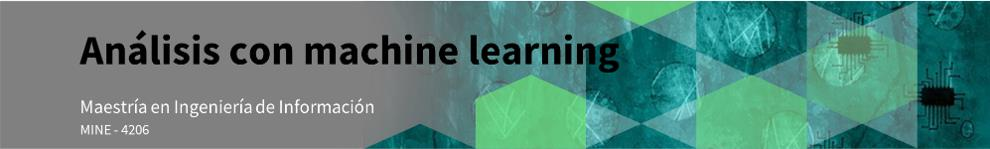

- **Integrante 1:** Brayan Garcia - 202322949
- **Integrante 2:** Ruben Bohorquez - 201413682
- **Integrante 3:** Daniel Ramos - 201412976
- **Integrante 4:** Sebastian Parrado - 201531947

# **Regresión**

**Resumen:** Este notebook presenta un análisis exploratorio de dos bases de datos y el en trenamiento del modelo de Regresión. Adicionalmente incluimos los resultados obtenidos por nuestro modelo de Clustering de tal manera que a partir de los grupos identificados podamos realizar la predicción del salario con base en las variables de entreada.



**Datos**:
- Información de salarios obtenida de [ai-jobs.net
](https://ai-jobs.net/salaries/download/) y [data-science-salaries-2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)


**Diccionario de datos:**

**1. ai-jobs.net:** Recopila información salarial de manera anónima de profesionales y empleadores de todo el mundo y la distribuye públicamente.Su objetivo es tener datos salariales abiertos para todos. Así que tanto profesionales jovenes como experimentados, gerentes de contratación, reclutadores y también fundadores de startups o personas que quieran cambiar de carrera puedan tomar decisiones más acertadas.

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **work_year** | The year the salary was paid. |
| **experience_level** | The experience level in the job during the year with the following possible values: EN: Entry-level / Junior, MI: Mid-level / Intermediate, SE: Senior-level / Expert, EX: Executive-level / Director |
| **employment_type** | The type of employement for the role: PT: Part-time, FT: Full-time, CT: Contract, FL: Freelance |
| **job_title** | The role worked in during the year. |
| **salary** | The total gross salary amount paid. |
| **salary_currency** | The currency of the salary paid as an ISO 4217 currency code. |
| **salary_in_usd** | The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.|
| **employee_residence** | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| **remote_ratio** | The overall amount of work done remotely, possible values are as follows: 0: No remote work (less than 20%), 50: Partially remote/hybird,100: Fully remote (more than 80%) |
| **company_location** | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| **company_size** | The average number of people that worked for the company during the year: S: less than 50 employees (small), M: 50 to 250 employees (medium), L: more than 250 employees (large) |

**2. data-science-salaries-2023:** Recopila información salarial

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **work_year** | The year the salary was paid. |
| **experience_level** | The experience level in the job during the year |
| **employment_type** | The type of employment for the role |
| **job_title** | The role worked in during the year. |
| **salary** | The total gross salary amount paid. |
| **salary_currency** | The currency of the salary paid as an ISO 4217 currency code. |
| **salary_in_usd** |The salary in USD.|
| **employee_residence** | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| **remote_ratio** | The overall amount of work done remotely |
| **company_location** | The country of the employer's main office or contracting branch. |
| **company_size** | The median number of people that worked for the company during the year |

Considerando que data-science-salaries-2023 presenta una estructura similar a la de ai-jobs.net, una página especializada en empleos en IA, ML, Ciencia de Datos y Big Data que actualiza su base de datos semanalmente, **tendríamos acceso a información actualizada constantemente.** Por ende, hemos optado por utilizar ai-jobs.net como nuestra fuente primaria, en lugar de considerar data-science-salaries-2023, ya que esta última no aportaría significativamente en términos de información.

# 0. Configuración inicial

## 0.1 Instalación de Paquetes

In [1]:
!pip install ydata_profiling
!pip install -q kaggle[]
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=1316e320fabd6b6f60d101d86eaf5923a2dae4120b62a65335f02f7a0655c361
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.2 MB/s eta 0:00:00


In [2]:
!pip install scikeras
!pip install keras-tuner
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


## 0.1 Importación de Paquetes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import roc_curve, auc

In [4]:
# Data management
import pandas as pd
import numpy as np
import copy

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis
# from ydata_profiling import ProfileReport

# Data Upload
from google.colab import files

# Data training

# Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

# Models
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

# Data hypotesis
from scipy.stats import ks_2samp


# Styles for Matplotlib


## 0.2 Carga de datos

###  ai-jobs.net:

In [5]:
# URL del archivo CSV
url = "https://ai-jobs.net/salaries/download/salaries.csv"

# Leer el archivo CSV y cargarlo en un DataFrame de pandas
df_ai_jobs = pd.read_csv(url)

# Visualizar las primeras filas del DataFrame para asegurarte de que los datos se cargaron correctamente
df_ai_jobs.head(5)

work_year experience_level employment_type          job_title  salary  \
0       2024               SE              FT  Applied Scientist  200200   
1       2024               SE              FT  Applied Scientist  194098   
2       2024               SE              FT      Data Engineer  196900   
3       2024               SE              FT      Data Engineer  175654   
4       2024               SE              FT      ETL Developer  140000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         200200                 US             0   
1             USD         194098                 US             0   
2             USD         196900                 US             0   
3             USD         175654                 US             0   
4             USD         140000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [6]:
dimensiones = df_ai_jobs.shape
print("Filas:", dimensiones[0])
print("Columnas:", dimensiones[1])

Filas: 19693
Columnas: 11


En la consulta más reciente, nuestra base de datos consta de 16,965 filas y 11 columnas. Dado que tenemos la intención de entrenar un algoritmo y evaluar su desempeño, la naturaleza dinámica de nuestra base de datos, que se actualiza constantemente, podría afectar los resultados obtenidos. Por tanto, para el entrenamiento y prueba del algoritmo, optaremos por utilizar la información disponible hasta el **27/04/2024**. Además, estableceremos un procedimiento para validar cómo se comporta el algoritmo frente a nueva información registrada posterior a esta fecha, y qué acciones podríamos tomar en caso de observar un rendimiento inferior.

# 1. Exploración de los datos (E.D.A.)

## 1.1. Exploración de los datos - ai-jobs.net

### 1.1.1. Separación en train, test y validation

Antes de iniciar vamos a dividir nuestros datos en datos de entrenamiento (train) y datos de prueba (test). Esto nos permitirá evaluar cómo se desempeña nuestro modelo con datos que no ha visto antes. Por lo general, se recomienda una partición aleatoria de 80% y 20%.

Se realizará el análisis exploratorio sobre el 80% de los datos de entrenamiento en lugar del 20% de prueba. Esto se hace para asegurar que los datos de prueba se consideren como totalmente nuevos y sirvan para validar que las transformaciones aplicadas a los datos de entrenamiento funcionen adecuadamente para los datos futuros.

Teniendo en cuenta lo mencionado anteriormente, se realiza la carga de información disponible a 27/04/2024

In [7]:
# Importar la biblioteca necesaria
from google.colab import files
import pandas as pd

# Cargar el archivo CSV
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_name)

# Visualizar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

df_ai_jobs=df

Saving salaries 27-04-2024.csv to salaries 27-04-2024.csv


In [8]:
# 20% for test and 80% for train
train_ai_jobs, test_ai_jobs = train_test_split(df_ai_jobs, test_size=0.2, random_state=19)
train_ai_jobs.head()

work_year experience_level employment_type               job_title  \
13260       2023               MI              FT      Analytics Engineer   
5618        2024               SE              FT            Data Analyst   
11095       2023               SE              FT           Data Engineer   
15098       2022               EN              FT  Applied Data Scientist   
2104        2024               SE              FT           Data Engineer   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
13260   50000             GBP          61520                 GB             0   
5618   100000             USD         100000                 US             0   
11095  225500             USD         225500                 US             0   
15098   40000             USD          40000                 AU           100   
2104   222200             USD         222200                 US             0   

      company_location company_size  
13260               GB            M  
5618                US            M  
11095               US            M  
15098               PK            M  
2104                US            M

Podemos comprobar el tamaño de cada partición

In [9]:
# Shapes of each partition
print("Train shape", train_ai_jobs.shape)
print("Test shape", test_ai_jobs.shape)

Train shape (13572, 11)
Test shape (3393, 11)


Además, podemos realizar una nueva partición para nuestro conjunto de validación

In [10]:
# 20% of traing for validation
new_train_ai_jobs, val_ai_jobs = train_test_split(train_ai_jobs, test_size=0.2, random_state=19)
new_train_ai_jobs.head()

work_year experience_level employment_type  \
2923        2024               SE              FT   
11846       2023               SE              FT   
5751        2024               MI              FT   
896         2024               EN              FT   
8534        2023               EN              FT   

                           job_title  salary salary_currency  salary_in_usd  \
2923                  Data Scientist  162000             USD         162000   
11846             Research Scientist  170000             USD         170000   
5751                    Data Analyst  100000             USD         100000   
896    Business Intelligence Analyst  192500             USD         192500   
8534                    Data Analyst   40400             USD          40400   

      employee_residence  remote_ratio company_location company_size  
2923                  US             0               US            M  
11846                 US             0               US            M  
5751                  US             0               US            M  
896                   US             0               US            M  
8534                  US             0               US            L

In [11]:
# Shapes of each partition
print("Train shape", new_train_ai_jobs.shape)
print("Test shape", test_ai_jobs.shape)
print("Validation shape", val_ai_jobs.shape)

Train shape (10857, 11)
Test shape (3393, 11)
Validation shape (2715, 11)


### 1.1.2. Estadisticas generales

Es fundamental destacar que la base de datos utilizada se actualiza semanalmente, incorporando nuevos registros. El Análisis Exploratorio de Datos (EDA) presentado se llevó a cabo con fecha del 3/04/2024.

In [12]:
# Data proffiling
import pandas as pd
from pandas_profiling import ProfileReport
ProfileReport(new_train_ai_jobs)

<ipython-input-12-deec7192f042>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Del data profiling, se destacan las siguientes características en el conjunto de entrenamiento (datos conocidos), que consiste en los datos conocidos sobre los cuales realizaremos la evaluación con el objetivo de generalizar lo mejor posible ante la llegada de nuevos datos de prueba (información desconocida futura):

* Se tiene un total de 10857 registros en train que cuentan con 11 variables distribuidas así: 3 de texto, 6 categoricas y 2 númericas.

* Se presenta 14.8% de filas duplicadas y 0% de valores faltantes para todo el dataframe.

* **work_year (variable categorica):** Los posibles valores de la variable varían desde 2020 hasta 2024, representando los años en los que se recopiló la información. Dado que el objetivo del proyecto es lograr predicciones salariales con el máximo grado de precisión, nos centraremos en los datos más recientes disponibles, correspondientes a los salarios de 2023 y 2024. La inclusión de datos de 2022, 2021 y 2020 podría resultar en predicciones salariales notablemente más bajas, considerando factores como la inflación. El año con mayor cantidad de registros es 2023 (5,496), seguido de 2024 (4,126), 2022 (1,045), 2021 (144) y 2020 (46).


* **experience_level (variable categorica):** Los posibles valores de la variable: EN: Entry-level / Junior, MI: Mid-level / Intermediate, SE: Senior-level / Expert, EX: Executive-level / Director se presentan de manera correcta con base en el diccionario de datos. El nivel de experiencia con mayor cantidad de registros es SE	(6,981), seguido de MI	(2,687), EN	(860) y EX	(329).

* **employment_type (variable categorica):**
Los valores potenciales de la variable "PT" (Part-time), "FT" (Full-time), "CT" (Contract) y "FL" (Freelance) se presentan correctamente según el diccionario de datos. La categoría "FT" cuenta con la mayor cantidad de trabajadores, con 10,811 registros, seguida de "PT" con 24, "CT" con 16 y "FL" con 6. Se ha decidido no considerar "PT", "CT" y "FL" debido al desequilibrio en los niveles de representación. Dado que no son muestras suficientemente representativas para generalizar información.

* **job_title (Variable de Texto):**
Se presentan 145 posibles titulos de trabajo. No se presentan registros vacios.

* **salary (Variable Numerica):**
Todos los registros estan copletos, con 2,113 valores distintos. El salario minimo es de 15,000 y el sario maximo de 30,400,000. Con una media de 165,900.37. Dada la amplia diferencia entre salarios, sera necesario, realizar una evaluación a mayor detalle de esta variable.

* **salary_currency (Variable Categorica):**
Se observan 21 valores distintos en la variable de moneda, donde USD cuenta con 10,050 registros, seguido de GBP con 397 y EUR con 299, entre otros. La moneda dominante es USD. Esta predominancia puede ser una de las razones por las cuales encontramos valores tan dispersos en la variable de salario al considerar diferentes tipos de monedas.

* **salary_in_usd (Variable Numerica):**
Se observan 2,381 registros únicos, con un salario mínimo de 15,000 y un máximo de 774,000, sin registros nulos. Al examinar la distribución de la variable a lo largo de los valores, notamos una alta concentración cerca de 150,000. Sin embargo, también será relevante analizar tanto los valores altos como los bajos.

* **employee_residence (Variable de Texto):**
Se observan 75 valores unicos referentes a distintos paises.

* **remote_ratio (Variable Categorica):**
Se identifican 3 valores únicos en la variable: 0 con 7,330 registros, 100 con 3,362 y 50 con 165. Aunque los 165 registros del nivel "50" son comparativamente menores en número, siguen siendo significativos en relación con el conjunto total de datos. La consideración de esta clase con 165 registros sigue siendo válida debido a su representación no despreciable en el conjunto de datos.

* **company_location (Variable de Texto):**
Se identifican 68 valores unicos.

* **company_size (Variable Categorica):**
Se identifica que hay 10,044 registros para emprresas medianas, 688 para grandes y 125 para pequeñas.


### 1.1.3 Tipos de datos

Podemos observar que en Pandas, no se hace distinción entre variables categoricas y variables de texto. Ambas son tratadas como object

In [13]:
# Columns and Datatypes
new_train_ai_jobs.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Salary_in_usd** es nuestra variable objetivo, que representa el salario en dólares estadounidenses. Esta variable nos proporciona información sobre el salario que una persona puede recibir, considerando diversas variables. Por lo tanto, abordaremos este problema como un caso de **Regresión**.

Es asi como tenemos las siguientes variables segun su tipo:

In [14]:
text_columns = ['job_title','employee_residence','company_location']

categorical_columns = ['work_year','experience_level','employment_type','salary_currency','remote_ratio','company_size']

numeric_columns = "salary"

target_variable = "salary_in_usd"

### 1.1.4. Análisis univariado

A pesar de que herramientas como Proffiling nos brinda un buen acercamiento a los datos, haremos un breve análisis para resaltar las caracteristicas que más nos importan. Ya que estás nos permitirán tomar decisiones relacionadas con el problema a resolver

#### 1.1.4.1. Variables Texto

* Variable job_title:

In [15]:
# Obtener los valores únicos de la columna "job_title"
unique_job_title = new_train_ai_jobs["job_title"].unique()

# Contar los valores únicos
cantidad_valores_unicos = len(unique_job_title)

# Imprimir los valores únicos y la cantidad
print("Valores únicos en la columna 'job_title':")
print(unique_job_title)
print("\nCantidad de valores únicos:", cantidad_valores_unicos)


Valores únicos en la columna 'job_title':
['Data Scientist' 'Research Scientist' 'Data Analyst'
 'Business Intelligence Analyst' 'Machine Learning Engineer'
 'Analytics Engineer' 'Data Science' 'Data Engineer' 'Head of Data'
 'Data Science Consultant' 'Data Manager' 'Applied Scientist'
 'Business Intelligence Engineer' 'BI Analyst' 'BI Developer'
 'Business Data Analyst' 'Decision Scientist' 'Research Analyst'
 'Data Analytics Manager' 'Data Architect' 'ML Engineer'
 'Data Science Analyst' 'Head of Data Science' 'Applied Data Scientist'
 'Analytics Engineering Manager' 'MLOps Engineer' 'Research Engineer'
 'AI Scientist' 'Business Intelligence Developer' 'Business Intelligence'
 'Data Science Engineer' 'Data Analytics Engineer'
 'Business Intelligence Manager' 'AI Engineer' 'Data Science Manager'
 'Applied Research Scientist' 'AI Architect' 'Director of Data Science'
 'Business Intelligence Lead' 'Data Science Practitioner'
 'Machine Learning Specialist' 'Deep Learning Engineer' 'AI Pr

In [16]:
import pandas as pd

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Obtener el conteo de registros para cada título de trabajo
conteo_registros = new_train_ai_jobs["job_title"].value_counts()

# Mostrar el conteo de registros para cada título de trabajo
print(conteo_registros)


job_title
Data Engineer                               2269
Data Scientist                              2199
Data Analyst                                1596
Machine Learning Engineer                   1114
Research Scientist                           346
Applied Scientist                            303
Data Architect                               297
Analytics Engineer                           273
Research Engineer                            195
Data Science                                 186
Business Intelligence Engineer               174
Data Manager                                 150
Business Intelligence Analyst                125
ML Engineer                                  119
Machine Learning Scientist                    87
Research Analyst                              87
AI Engineer                                   77
Data Science Manager                          73
Business Intelligence                         67
BI Developer                                  60
Data Speci

Identificamos 145 títulos profesionales únicos en la variable. Sin embargo, al profundizar en el análisis detallado de cada uno, notamos que algunos de ellos tienen un número muy reducido de registros, llegando incluso a tener solo 1. Por tanto, es crucial abordar este aspecto durante nuestra fase de limpieza de datos para evitar incluir registros individuales que podrían sesgar la generalización del comportamiento de la población.

* Variable employee_residence:

In [17]:
# Obtener los valores únicos de la columna "employee_residence"
unique_employee_residence = new_train_ai_jobs["employee_residence"].unique()

# Contar los valores únicos
cantidad_valores_unicos = len(unique_employee_residence)

# Imprimir los valores únicos y la cantidad
print("Valores únicos en la columna 'employee_residence':")
print(unique_employee_residence)
print("\nCantidad de valores únicos:", cantidad_valores_unicos)


Valores únicos en la columna 'employee_residence':
['US' 'FR' 'GB' 'CA' 'NL' 'KE' 'SI' 'AT' 'EE' 'VN' 'BR' 'DE' 'BA' 'TH'
 'IN' 'AE' 'HK' 'ES' 'AU' 'IT' 'UA' 'NZ' 'PT' 'AR' 'PK' 'PL' 'SG' 'CL'
 'DK' 'CH' 'LV' 'NG' 'TN' 'PH' 'EG' 'CZ' 'JP' 'LT' 'CO' 'HR' 'GR' 'CR'
 'UZ' 'ZA' 'SE' 'LU' 'MD' 'IE' 'TR' 'HU' 'CN' 'BE' 'NO' 'RU' 'CF' 'SA'
 'IL' 'FI' 'RS' 'MX' 'GH' 'BG' 'EC' 'PR' 'UG' 'MT' 'LB' 'DO' 'IQ' 'MU'
 'DZ' 'RO' 'KW' 'AD' 'OM']

Cantidad de valores únicos: 75


In [18]:
import pandas as pd

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Obtener el conteo de registros para cada employee_residence
conteo_registros = new_train_ai_jobs["employee_residence"].value_counts()

# Mostrar el conteo de registros para cada employee_residence
print(conteo_registros)


employee_residence
US    9502
GB     448
CA     301
ES      95
DE      64
IN      49
FR      48
AU      31
NL      24
PT      20
BR      16
ZA      13
IT      13
LT      13
GR      12
CO      11
AR      11
PL      11
AT       8
PH       8
NG       8
JP       7
CH       7
EG       7
MX       7
LV       7
EE       7
IE       7
UA       6
VN       5
BE       5
FI       5
NZ       5
TR       5
SI       4
RU       4
HR       4
PR       4
PK       4
AE       3
DK       3
HU       3
LB       2
GH       2
HK       2
KE       2
BA       2
SA       2
CF       2
SG       2
NO       2
UG       1
MT       1
EC       1
RO       1
AD       1
DO       1
IQ       1
MU       1
DZ       1
KW       1
TH       1
SE       1
BG       1
RS       1
IL       1
CN       1
MD       1
LU       1
UZ       1
CR       1
CZ       1
TN       1
CL       1
OM       1
Name: count, dtype: int64


Identificamos 75 lugares de residencia únicos en la variable. Sin embargo, al profundizar en el análisis detallado de cada uno, notamos que algunos de ellos tienen un número muy reducido de registros, llegando incluso a tener solo 1. Por tanto, es crucial abordar este aspecto durante nuestra fase de limpieza de datos para evitar incluir registros individuales que podrían sesgar la generalización del comportamiento de la población.

* Variable company_location:

In [19]:
# Obtener los valores únicos de la columna "company_location"
unique_company_location = new_train_ai_jobs["company_location"].unique()

# Contar los valores únicos
cantidad_valores_unicos = len(unique_company_location)

# Imprimir los valores únicos y la cantidad
print("Valores únicos en la columna 'company_location':")
print(unique_company_location)
print("\nCantidad de valores únicos:", cantidad_valores_unicos)

Valores únicos en la columna 'company_location':
['US' 'DE' 'GB' 'CA' 'NL' 'KE' 'SI' 'AT' 'EE' 'BR' 'FR' 'BA' 'TH' 'IN'
 'AE' 'HK' 'ES' 'AU' 'IT' 'UA' 'NZ' 'PT' 'AR' 'PK' 'PL' 'SG' 'CL' 'DK'
 'CH' 'LV' 'NG' 'CZ' 'PH' 'EG' 'JP' 'LT' 'CO' 'GR' 'VN' 'RU' 'ZA' 'SE'
 'LU' 'MD' 'IE' 'HR' 'IL' 'HU' 'NO' 'BE' 'CF' 'TR' 'SA' 'RO' 'AS' 'FI'
 'MX' 'GH' 'EC' 'PR' 'MT' 'LB' 'IQ' 'MU' 'DZ' 'ID' 'AD' 'OM']

Cantidad de valores únicos: 68


In [20]:
import pandas as pd

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Obtener el conteo de registros para cada company_location
conteo_registros = new_train_ai_jobs["company_location"].value_counts()

# Mostrar el conteo de registros para cada company_location
print(conteo_registros)


company_location
US    9530
GB     454
CA     302
ES      95
DE      71
FR      44
IN      39
AU      33
NL      24
PT      19
BR      16
LT      13
ZA      13
CO      11
IT      10
PL      10
GR       9
MX       8
AR       7
LV       7
IE       7
CH       7
JP       7
AT       7
EE       7
UA       6
NG       6
EG       6
FI       5
DK       5
PH       5
NZ       5
RU       4
BE       4
SI       4
AS       3
TR       3
HU       3
LU       3
PR       3
CZ       3
AE       3
VN       3
KE       2
SA       2
CF       2
NO       2
HR       2
IL       2
BA       2
LB       2
IQ       1
MU       1
DZ       1
MT       1
ID       1
AD       1
EC       1
PK       1
GH       1
RO       1
MD       1
SE       1
TH       1
HK       1
CL       1
SG       1
OM       1
Name: count, dtype: int64


Identificamos 68 lugares únicos en la variable. Sin embargo, al profundizar en el análisis detallado de cada uno, notamos que algunos de ellos tienen un número muy reducido de registros, llegando incluso a tener solo 1. Por tanto, es crucial abordar este aspecto durante nuestra fase de limpieza de datos para evitar incluir registros individuales que podrían sesgar la generalización del comportamiento de la población.

#### 1.1.4.2. Variables categoricas

Se presentan gráficos de barras para mejorar la comprensión de estas variables:

Text(0.5, 0.98, 'Categorical columns distribution')

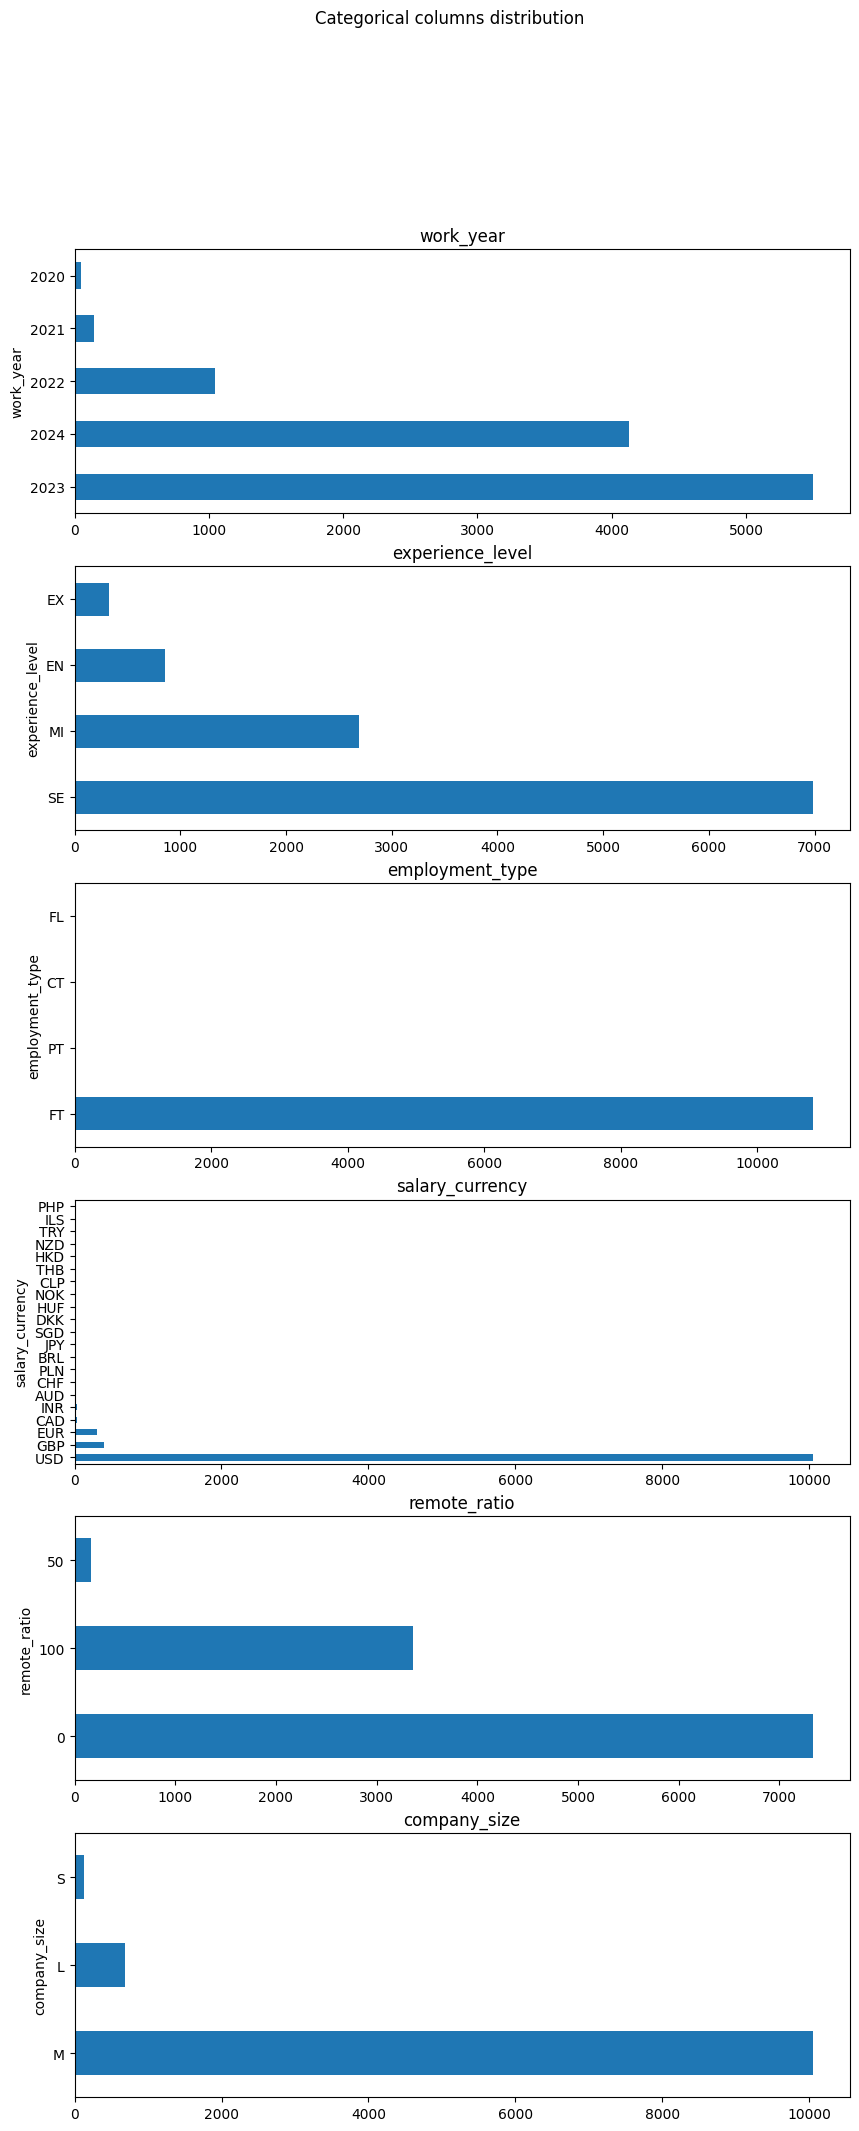

In [21]:
# Categorical columns distribition
n = len(categorical_columns)
fig, axs = plt.subplots(n,1, figsize=(10,n*4))
for ax, col in zip(axs.reshape(-1), categorical_columns):
    ax.title.set_text(col)
    new_train_ai_jobs[col].value_counts().plot.barh(ax=ax)
fig.suptitle('Categorical columns distribution')

#### 1.1.4.3. Variables númericas

Se explora a mayor detalle las variables númericas, en esta caso salary:

In [22]:
# Describe for numeric columns
new_train_ai_jobs[numeric_columns].describe()

count    1.085700e+04
mean     1.659004e+05
std      4.014156e+05
min      1.500000e+04
25%      1.020000e+05
50%      1.420000e+05
75%      1.870000e+05
max      3.040000e+07
Name: salary, dtype: float64

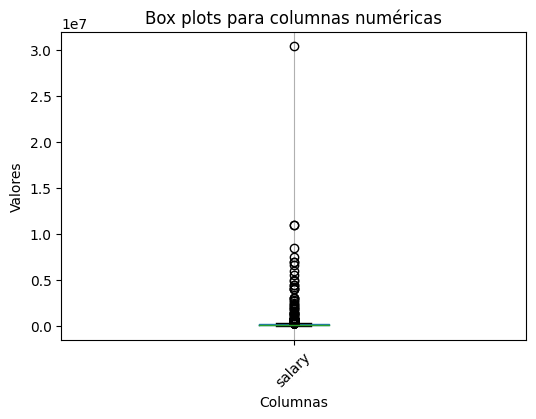

In [23]:
# Configurar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear un DataFrame con las columnas numéricas
numeric_df = new_train_ai_jobs[numeric_columns].to_frame()

# Crear los box plots para las columnas numéricas
numeric_df.boxplot()
plt.title('Box plots para columnas numéricas')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar los box plots
plt.show()


Se observa una notable dispersión en los datos. No obstante, como se discutió anteriormente, esto podría ser atribuible principalmente a que el salario está representado en varias monedas.

#### 1.1.4.4. Análisis Variable objetivo

Se realiza un analisis mas detallado a la variable objetivo definida: salary_in_usd

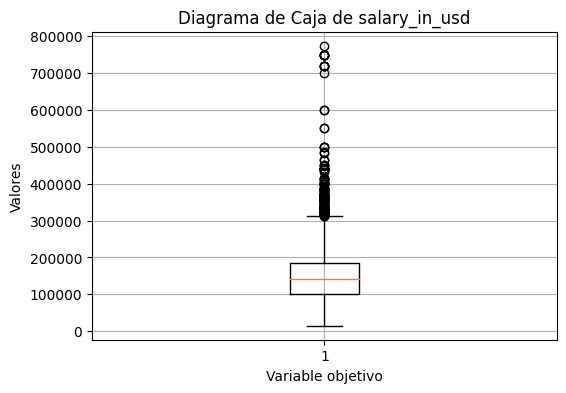

In [24]:
import matplotlib.pyplot as plt

# Gráfico de caja
plt.figure(figsize=(6, 4))
plt.boxplot(new_train_ai_jobs[target_variable])
plt.title('Diagrama de Caja de {}'.format(target_variable))
plt.xlabel('Variable objetivo')
plt.ylabel('Valores')
plt.grid(True)
plt.show()



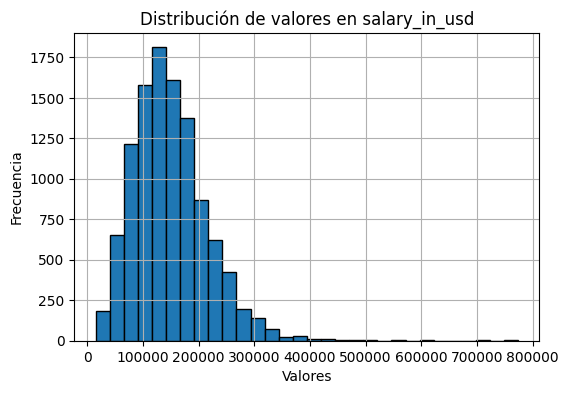

In [25]:
# Histograma para mostrar la distribución de los valores de la variable objetivo
plt.figure(figsize=(6, 4))

# Crear el histograma
plt.hist(new_train_ai_jobs[target_variable], bins=30, edgecolor='black')
plt.title('Distribución de valores en {}'.format(target_variable))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [26]:
import numpy as np

# Calcular el rango intercuartílico
Q1 = new_train_ai_jobs[target_variable].quantile(0.25)
Q3 = new_train_ai_jobs[target_variable].quantile(0.75)
IQR = Q3 - Q1

# Encontrar los registros por encima del rango intercuartílico
outliers = new_train_ai_jobs[new_train_ai_jobs[target_variable] > Q3 + 1.5 * IQR]

# Contar la cantidad de registros por encima del rango intercuartílico
cantidad_outliers = len(outliers)

print("Cantidad de registros por encima del rango intercuartílico:", cantidad_outliers)

Cantidad de registros por encima del rango intercuartílico: 189


In [27]:
(len(outliers)/len(new_train_ai_jobs))*100

1.7408123791102514

In [28]:
import numpy as np

# Calcular el rango intercuartílico
Q1 = new_train_ai_jobs[target_variable].quantile(0.25)
Q3 = new_train_ai_jobs[target_variable].quantile(0.75)
IQR = Q3 - Q1

# Encontrar los registros por encima del rango intercuartílico
outliers_superior = new_train_ai_jobs[new_train_ai_jobs[target_variable] > Q3 + 1.5 * IQR]

# Encontrar los registros por debajo del rango intercuartílico
outliers_inferior = new_train_ai_jobs[new_train_ai_jobs[target_variable] < Q1 - 1.5 * IQR]

# Contar la cantidad de registros por encima del rango intercuartílico
cantidad_outliers_superior = len(outliers_superior)

# Contar la cantidad de registros por debajo del rango intercuartílico
cantidad_outliers_inferior = len(outliers_inferior)

print("Cantidad de registros por encima del rango intercuartílico:", cantidad_outliers_superior)
print("Cantidad de registros por debajo del rango intercuartílico:", cantidad_outliers_inferior)


Cantidad de registros por encima del rango intercuartílico: 189
Cantidad de registros por debajo del rango intercuartílico: 0


In [29]:
# Obtener los índices de los outliers
indices_outliers = outliers.index

# Filtrar los valores únicos de la columna "job_title" para los outliers
valores_unicos_outliers = new_train_ai_jobs.loc[indices_outliers, "job_title"].unique()

# Mostrar los valores únicos de la columna "job_title" para los outliers
print("Valores únicos de la columna 'job_title' para los outliers:")
print(valores_unicos_outliers)


Valores únicos de la columna 'job_title' para los outliers:
['Head of Data' 'Machine Learning Engineer'
 'Analytics Engineering Manager' 'ML Engineer' 'AI Architect'
 'Data Scientist' 'Research Scientist' 'Data Architect'
 'Analytics Engineer' 'Data Infrastructure Engineer' 'Research Engineer'
 'Data Science Tech Lead' 'Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'Head of Data Science' 'Data Lead'
 'Principal Data Scientist' 'Data Science' 'AI Engineer' 'Data Analyst'
 'Head of Machine Learning' 'Applied Data Scientist' 'Data Analytics Lead'
 'Machine Learning Developer' 'Data Science Manager'
 'Deep Learning Engineer' 'Applied Scientist' 'Prompt Engineer'
 'Business Intelligence' 'Data Product Owner']


Al analizar la variable objetivo, se identificaron 189 registros fuera del rango intercuartílico. Se buscó determinar si estos registros superaban el límite inferior o superior y en qué medida. Se encontró que todos ellos excedían el límite superior. Ante esta observación, se decidió investigar si esta situación se debía a roles de vicepresidencia o liderazgo dentro de las organizaciones. Sin embargo, al examinar los títulos de manera detallada, se descubrió que muchos de ellos no correspondían lógicamente a estos niveles jerárquicos. Por lo tanto, en la fase de limpieza de datos, se optó por eliminar estos registros, considerándolos como datos erróneos que podrían distorsionar el análisis.

### 1.1.5. Análisis Bivariado

#### 1.1.5.1. Relación variables categoricas con variable objetivo

A continuación vamos a comprobar si hay una relación directa entre nuestras variables categoricas y la variable objetivo

* Variable objetivo y work_year:

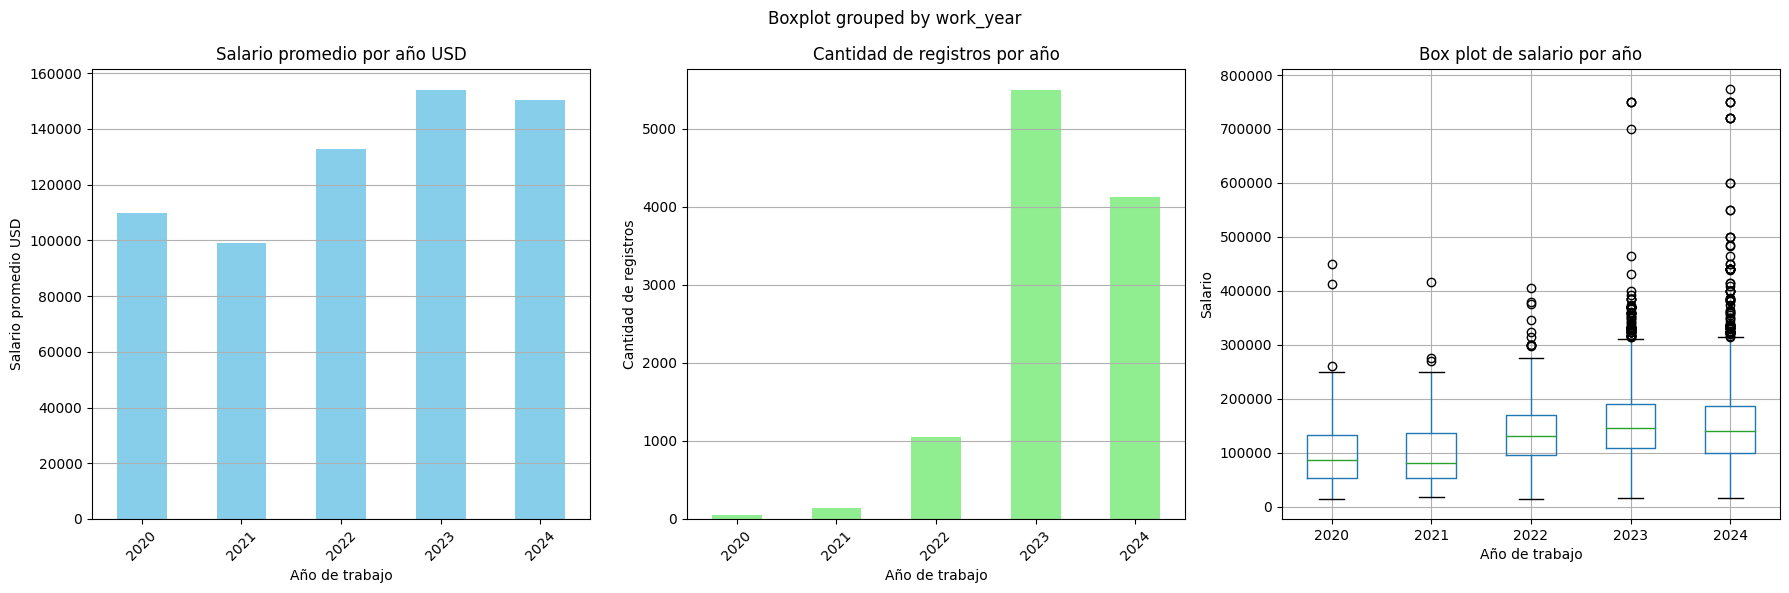

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el salario promedio por año
salario_promedio_por_año = new_train_ai_jobs.groupby("work_year")[target_variable].mean()

# Calcular la cantidad de registros para cada año
cantidad_registros_por_año = new_train_ai_jobs["work_year"].value_counts().sort_index()

# Configurar el tamaño de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el salario promedio por año
salario_promedio_por_año.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Salario promedio por año USD")
axes[0].set_xlabel("Año de trabajo")
axes[0].set_ylabel("Salario promedio USD")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Graficar la cantidad de registros para cada año
cantidad_registros_por_año.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Cantidad de registros por año")
axes[1].set_xlabel("Año de trabajo")
axes[1].set_ylabel("Cantidad de registros")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Box plot de salario por año
salario_por_año_boxplot = new_train_ai_jobs.boxplot(column=target_variable, by='work_year', ax=axes[2])
axes[2].set_title("Box plot de salario por año")
axes[2].set_ylabel("Salario")
axes[2].set_xlabel("Año de trabajo")

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se observa que, en general, los registros reflejan el comportamiento de la economía en su conjunto. Después de 2020, se observa una disminución en los salarios atribuible a la pandemia, seguida de una recuperación y un posterior aumento, seguido nuevamente por una disminución en 2024. Además, se nota que la mayor cantidad de registros se encuentra en 2023, y la presencia de datos atípicos tiende a intensificarse a medida que aumenta el número de registros para un año en particular.

* Variable objetivo y experience_level:

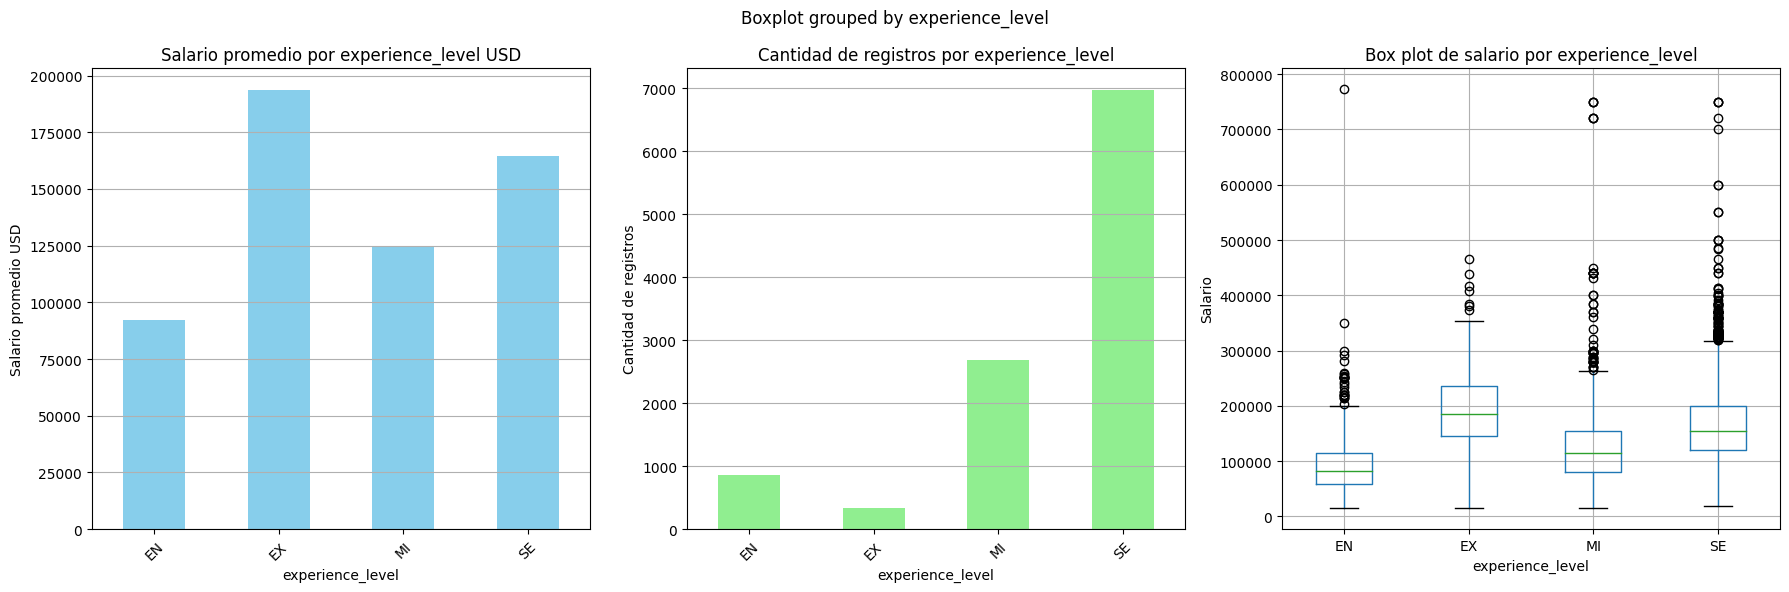

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el salario promedio por experience_level
salario_promedio_por_año = new_train_ai_jobs.groupby("experience_level")[target_variable].mean()

# Calcular la cantidad de registros para experience_level
cantidad_registros_por_año = new_train_ai_jobs["experience_level"].value_counts().sort_index()

# Configurar el tamaño de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el salario promedio por año
salario_promedio_por_año.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Salario promedio por experience_level USD")
axes[0].set_xlabel("experience_level")
axes[0].set_ylabel("Salario promedio USD")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Graficar la cantidad de registros para cada año
cantidad_registros_por_año.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Cantidad de registros por experience_level")
axes[1].set_xlabel("experience_level")
axes[1].set_ylabel("Cantidad de registros")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Box plot de salario por año
salario_por_año_boxplot = new_train_ai_jobs.boxplot(column=target_variable, by='experience_level', ax=axes[2])
axes[2].set_title("Box plot de salario por experience_level")
axes[2].set_ylabel("Salario")
axes[2].set_xlabel("experience_level")

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


La información presentada refleja fielmente la realidad, ya que se observa que a medida que el nivel jerárquico del puesto aumenta, el salario promedio también tiende a incrementarse. Además, se destaca que hay una oferta limitada para roles ejecutivos en comparación con la alta demanda de posiciones senior.

* Variable objetivo y employment_type:

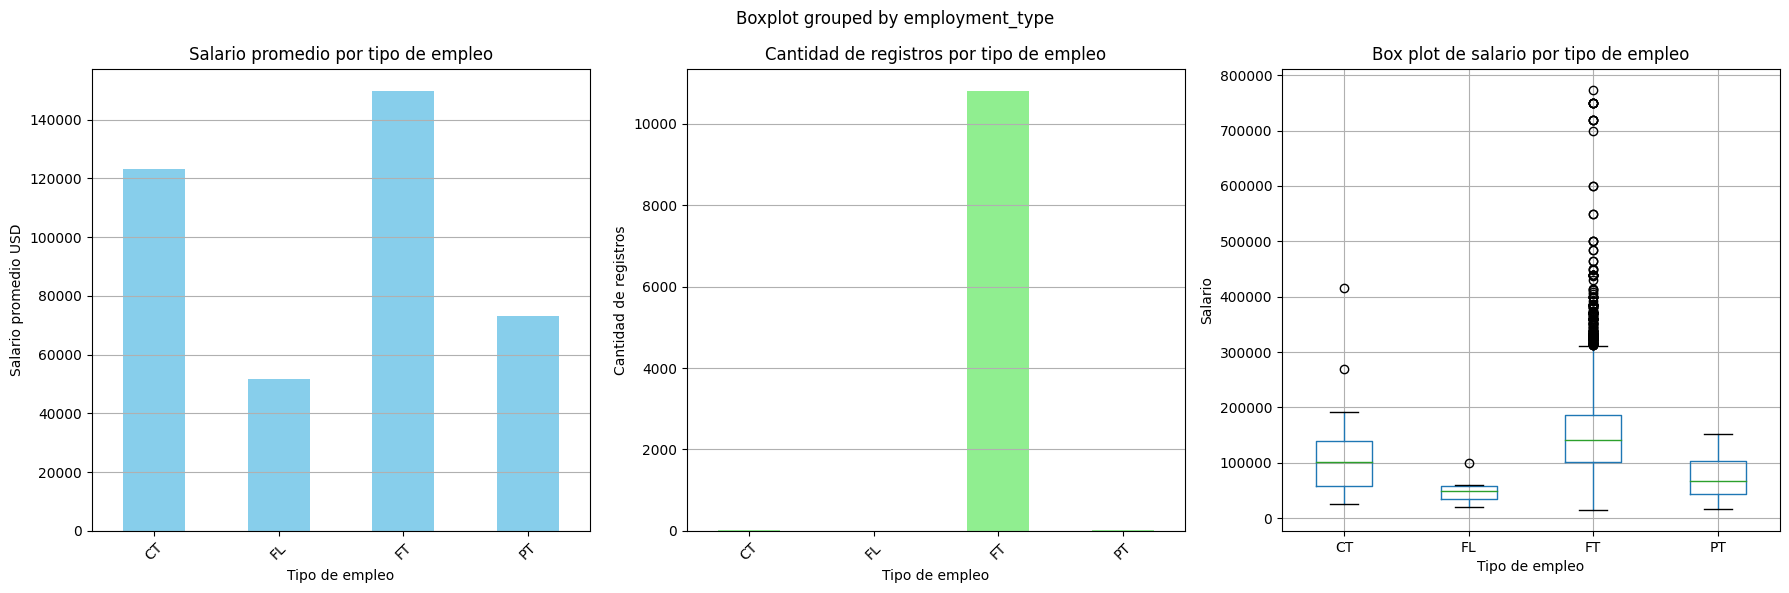

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el salario promedio por tipo de empleo
salario_promedio_por_empleo = new_train_ai_jobs.groupby("employment_type")[target_variable].mean()

# Calcular la cantidad de registros para cada tipo de empleo
cantidad_registros_por_empleo = new_train_ai_jobs["employment_type"].value_counts().sort_index()

# Configurar el tamaño de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el salario promedio por tipo de empleo
salario_promedio_por_empleo.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Salario promedio por tipo de empleo")
axes[0].set_xlabel("Tipo de empleo")
axes[0].set_ylabel("Salario promedio USD")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Graficar la cantidad de registros para cada tipo de empleo
cantidad_registros_por_empleo.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Cantidad de registros por tipo de empleo")
axes[1].set_xlabel("Tipo de empleo")
axes[1].set_ylabel("Cantidad de registros")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Box plot de salario por tipo de empleo
salario_por_empleo_boxplot = new_train_ai_jobs.boxplot(column=target_variable, by='employment_type', ax=axes[2])
axes[2].set_title("Box plot de salario por tipo de empleo")
axes[2].set_ylabel("Salario")
axes[2].set_xlabel("Tipo de empleo")

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se observa una cantidad significativamente menor de registros para empleos que no son de tiempo completo en comparación con los empleos a tiempo completo. Esta disparidad sugiere que las oportunidades laborales que no son a tiempo completo son escasas y, por lo tanto, realizar un análisis detallado de estas podría no ser muy útil.

* Variable objetivo y salary_currency:

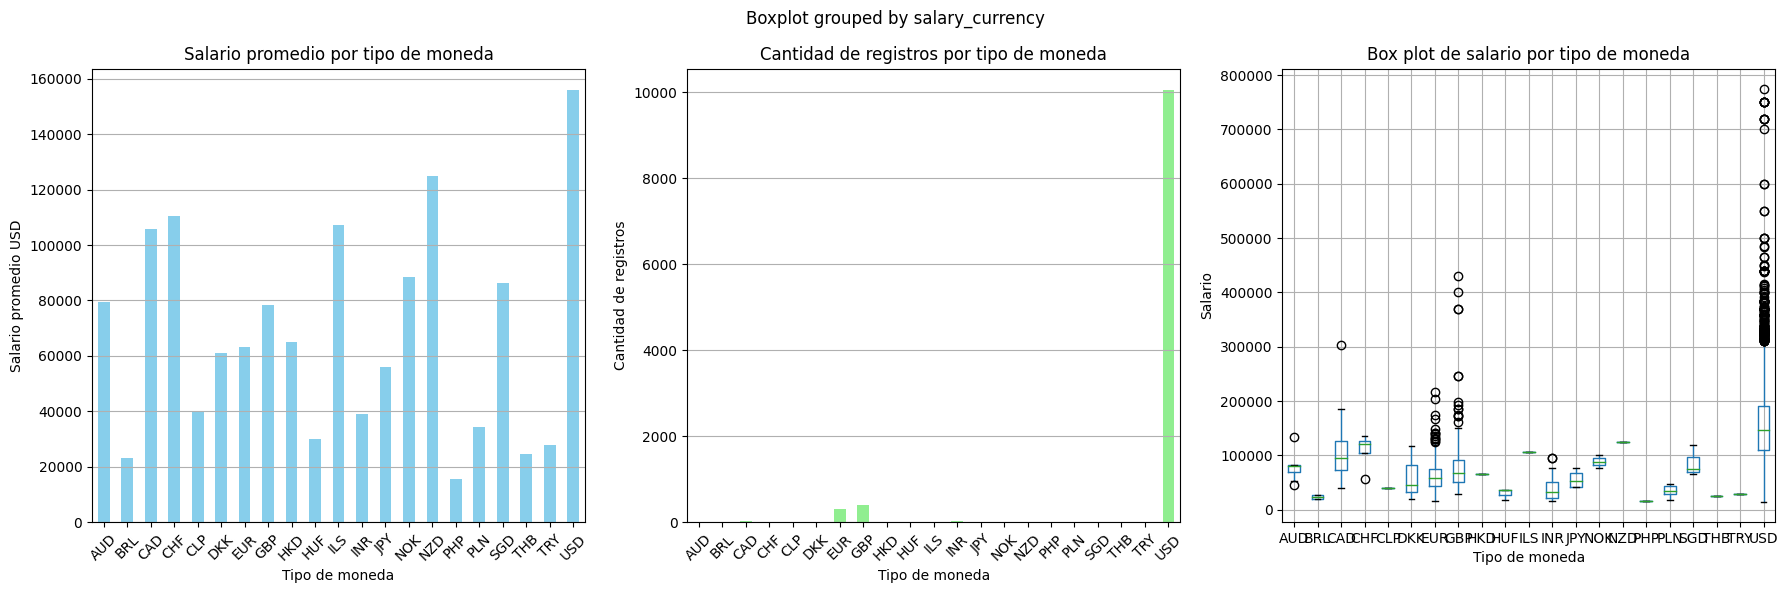

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el salario promedio por tipo de moneda
salario_promedio_por_moneda = new_train_ai_jobs.groupby("salary_currency")[target_variable].mean()

# Calcular la cantidad de registros para cada tipo de moneda
cantidad_registros_por_moneda = new_train_ai_jobs["salary_currency"].value_counts().sort_index()

# Configurar el tamaño de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el salario promedio por tipo de moneda
salario_promedio_por_moneda.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Salario promedio por tipo de moneda")
axes[0].set_xlabel("Tipo de moneda")
axes[0].set_ylabel("Salario promedio USD")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Graficar la cantidad de registros para cada tipo de moneda
cantidad_registros_por_moneda.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Cantidad de registros por tipo de moneda")
axes[1].set_xlabel("Tipo de moneda")
axes[1].set_ylabel("Cantidad de registros")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Box plot de salario por tipo de moneda
salario_por_moneda_boxplot = new_train_ai_jobs.boxplot(column=target_variable, by='salary_currency', ax=axes[2])
axes[2].set_title("Box plot de salario por tipo de moneda")
axes[2].set_ylabel("Salario")
axes[2].set_xlabel("Tipo de moneda")

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se evidencia que la moneda predominante en las publicaciones es el dólar estadounidense (USD), lo que sugiere que analizar otras divisas puede resultar poco relevante debido a la gran brecha en el número de registros en comparación con el dólar.

* Variable objetivo y remote_ratio:

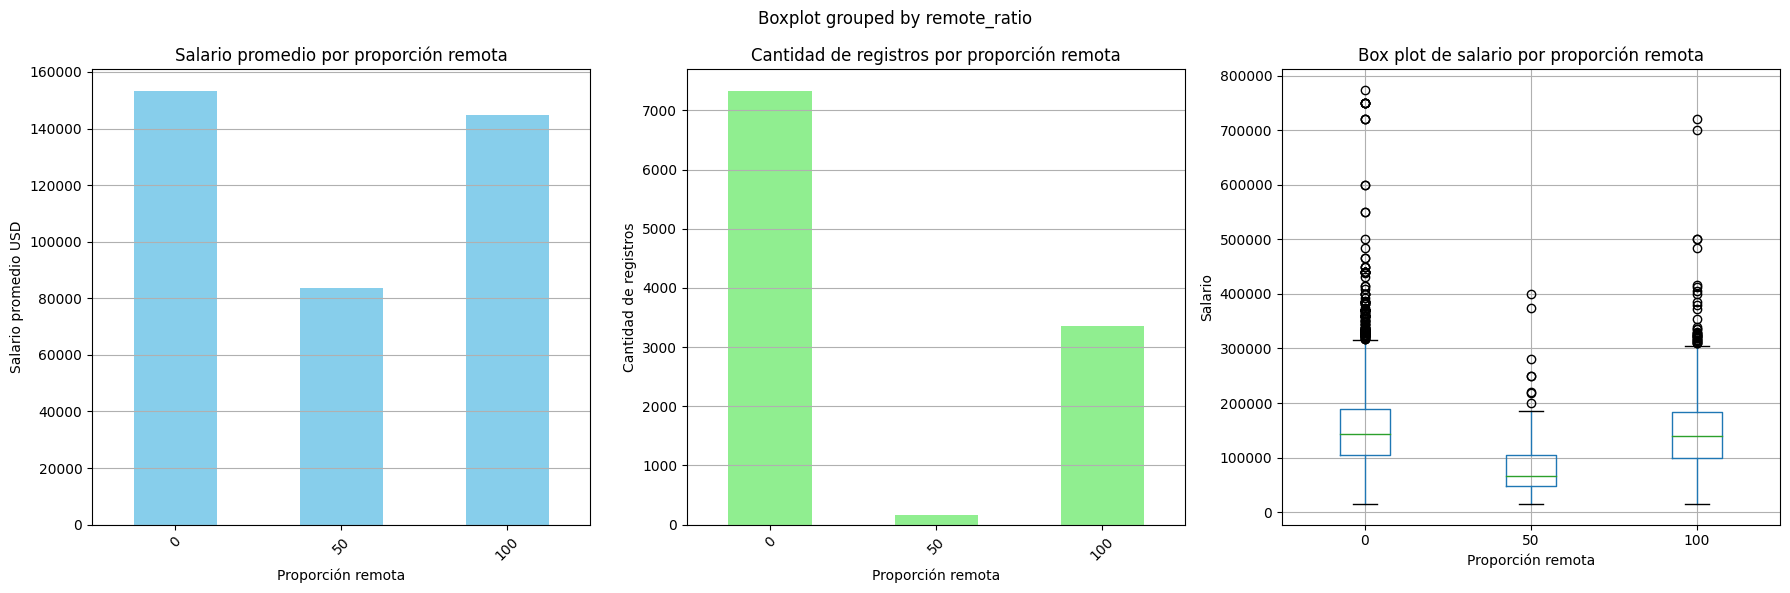

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el salario promedio por proporción remota
salario_promedio_por_proporcion_remota = new_train_ai_jobs.groupby("remote_ratio")[target_variable].mean()

# Calcular la cantidad de registros para cada proporción remota
cantidad_registros_por_proporcion_remota = new_train_ai_jobs["remote_ratio"].value_counts().sort_index()

# Configurar el tamaño de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el salario promedio por proporción remota
salario_promedio_por_proporcion_remota.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Salario promedio por proporción remota")
axes[0].set_xlabel("Proporción remota")
axes[0].set_ylabel("Salario promedio USD")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Graficar la cantidad de registros para cada proporción remota
cantidad_registros_por_proporcion_remota.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Cantidad de registros por proporción remota")
axes[1].set_xlabel("Proporción remota")
axes[1].set_ylabel("Cantidad de registros")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Box plot de salario por proporción remota
salario_por_proporcion_remota_boxplot = new_train_ai_jobs.boxplot(column=target_variable, by='remote_ratio', ax=axes[2])
axes[2].set_title("Box plot de salario por proporción remota")
axes[2].set_ylabel("Salario")
axes[2].set_xlabel("Proporción remota")

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [35]:
from scipy.stats import f_oneway

# Filtrar los datos para incluir solo remote_ratio igual a 50 y 100
filtered_data_50 = new_train_ai_jobs[new_train_ai_jobs["remote_ratio"] == 50]
filtered_data_100 = new_train_ai_jobs[new_train_ai_jobs["remote_ratio"] == 100]

# Realizar ANOVA
f_statistic, p_value = f_oneway(filtered_data_50[target_variable], filtered_data_100[target_variable])

# Imprimir resultados
print("Estadística F:", f_statistic)
print("Valor p:", p_value)


Estadística F: 153.72478642598756
Valor p: 1.3851283846199177e-34


Es notable que las ofertas que ofrecen una opción de trabajo parcialmente remoto presentan un salario promedio considerablemente inferior en comparación con las opciones de trabajo presencial (0) y totalmente remoto (100). Dado que la cantidad de registros en la opción parcial es considerablemente menor, parece más adecuado no considerar esta categoría en el análisis. Es importante resaltar que existe una diferencia significativa entre trabajo precensial y remoto.

* Variable objetivo y company_size:

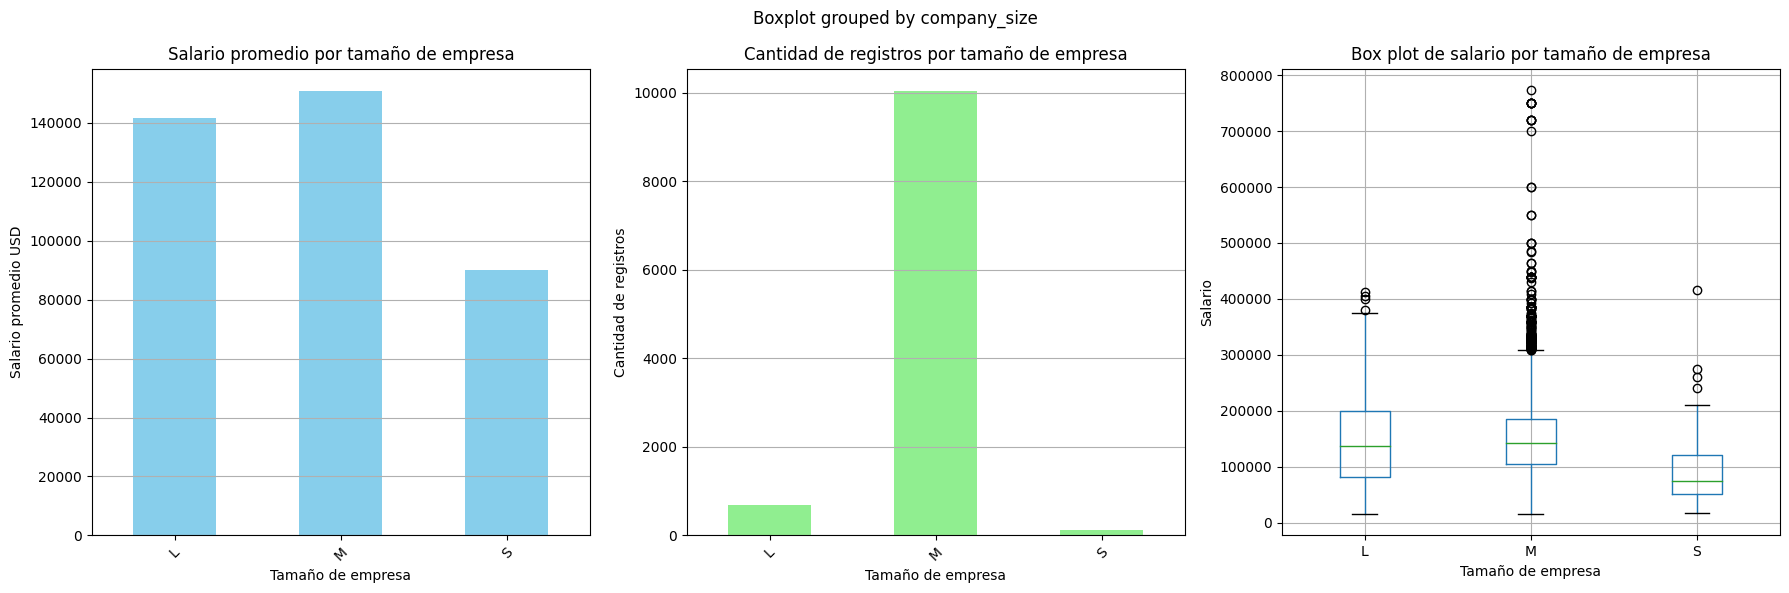

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el salario promedio por tamaño de empresa
salario_promedio_por_tamaño_empresa = new_train_ai_jobs.groupby("company_size")[target_variable].mean()

# Calcular la cantidad de registros para cada tamaño de empresa
cantidad_registros_por_tamaño_empresa = new_train_ai_jobs["company_size"].value_counts().sort_index()

# Configurar el tamaño de la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el salario promedio por tamaño de empresa
salario_promedio_por_tamaño_empresa.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Salario promedio por tamaño de empresa")
axes[0].set_xlabel("Tamaño de empresa")
axes[0].set_ylabel("Salario promedio USD")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Graficar la cantidad de registros para cada tamaño de empresa
cantidad_registros_por_tamaño_empresa.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Cantidad de registros por tamaño de empresa")
axes[1].set_xlabel("Tamaño de empresa")
axes[1].set_ylabel("Cantidad de registros")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Box plot de salario por tamaño de empresa
salario_por_tamaño_empresa_boxplot = new_train_ai_jobs.boxplot(column=target_variable, by='company_size', ax=axes[2])
axes[2].set_title("Box plot de salario por tamaño de empresa")
axes[2].set_ylabel("Salario")
axes[2].set_xlabel("Tamaño de empresa")

# Ajustar el diseño para evitar que los títulos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [37]:
from scipy.stats import f_oneway

# Filtrar los datos para incluir solo empresas medianas (M) y grandes (L)
filtered_data_M = new_train_ai_jobs[new_train_ai_jobs["company_size"] == "M"]
filtered_data_L = new_train_ai_jobs[new_train_ai_jobs["company_size"] == "L"]

# Realizar ANOVA
f_statistic, p_value = f_oneway(filtered_data_M[target_variable], filtered_data_L[target_variable])

# Imprimir resultados
print("Estadística F:", f_statistic)
print("Valor p:", p_value)


Estadística F: 12.018133679901176
Valor p: 0.0005289176925834462


Se observa que hay más registros para empresas medianas en comparación con las grandes y las pequeñas. Sin embargo, al analizar los salarios promedio, las empresas medianas y grandes presentan una diferencia significativa. Por otro lado, al evaluar las empresas pequeñas, se nota una disminución significativa en el valor promedio de los salarios.

**Anova:** Por último, se lleva a cabo un análisis de varianza para determinar si existe una diferencia significativa en la media de la variable de interés a lo largo de los niveles de las variables categóricas.

In [38]:
from scipy.stats import f_oneway

# Lista de columnas categóricas
categorical_columns = ['work_year', 'experience_level', 'employment_type', 'salary_currency', 'remote_ratio', 'company_size']

# Variable objetivo
target_variable = "salary_in_usd"

# Realizar ANOVA para cada variable categórica
for column in categorical_columns:
    # Obtener los grupos para ANOVA
    groups = []
    for category in new_train_ai_jobs[column].unique():
        groups.append(new_train_ai_jobs[new_train_ai_jobs[column] == category][target_variable])

    # Realizar ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Imprimir resultados
    print("Variable categórica:", column)
    print("Estadística F:", f_statistic)
    print("Valor p:", p_value)
    print("")



Variable categórica: work_year
Estadística F: 45.875402647431166
Valor p: 2.795056675650728e-38

Variable categórica: experience_level
Estadística F: 555.0593944217005
Valor p: 0.0

Variable categórica: employment_type
Estadística F: 15.107814243711783
Valor p: 8.263065401509719e-10

Variable categórica: salary_currency
Estadística F: 65.6905013640571
Valor p: 1.2099878237810093e-250

Variable categórica: remote_ratio
Estadística F: 98.76506472280404
Valor p: 3.1081939262589076e-43

Variable categórica: company_size
Estadística F: 54.69718118980824
Valor p: 2.313268591535703e-24



Dado que el valor p es menor que 0.05, indica que hay evidencia suficiente para rechazar la hipótesis nula y concluir que existen diferencias significativas entre los grupos. Observamos que todas las variables resultan ser significativas.

#### 1.1.5.2. Relación variables numericas con variable objetivo

Para validar los datos, se procede a evaluar la correlación entre las variables 'salary' y 'salary_in_usd'. Dado que ambas buscan representar la misma información, se espera una alta correlación entre ellas

In [39]:
correlation = new_train_ai_jobs[[target_variable, "salary"]].corr()
print(correlation)



               salary_in_usd    salary
salary_in_usd       1.000000  0.107925
salary              0.107925  1.000000


Sin embargo, se obtiene una correlación ligeramente superior al 10%. Atribuimos esto a la presencia de diferentes tipos de divisas en la variable 'salary'. Esta hipótesis se confirma al filtrar los registros en los que la moneda está expresada en dólares estadounidenses (USD) y volver a calcular la correlación, encontrando un valor de 1.

In [40]:
# Filtrar el DataFrame por "salary_currency" igual a "USD"
filtered_df = new_train_ai_jobs[new_train_ai_jobs["salary_currency"] == "USD"]

# Calcular la correlación entre "salary" y "salary_currency" (que será 1 porque es la misma variable)
correlation = filtered_df[target_variable].corr(filtered_df["salary"])

print("Correlación entre 'target_variable' y 'salary' cuando 'salary_currency' es 'USD':", correlation)


Correlación entre 'target_variable' y 'salary' cuando 'salary_currency' es 'USD': 1.0


### 1.1.6. Conclusiones EDA

* **Variables de Tipo Texto:**

1. job_title: Tuvimos 145 títulos únicos en la variable 'job_title', y muchos de ellos aparecieron solo una vez. Dado que contar con un número tan reducido de registros no es recomendable para generalizar el comportamiento de una población, decidimos establecer un criterio empírico y considerar únicamente aquellos títulos que cuentan con al menos 10 registros.

2. employee_residence: La variable parece no aportar significativamente información, ya que solo indica el país de residencia primario durante el año laboral. Por lo tanto, no consideramos que sea relevante incluirla en el entrenamiento de nuestro algoritmo.

3. company_location: Tampoco consideramos relevante la variable 'company_location', ya que el país de la oficina principal del empleador o sucursal contratante no es determinante, especialmente considerando la presencia internacional de muchas empresas y su adaptación al contexto local.

* **Variables Categoricas:**

1. work_year: Dado que buscamos un modelo que se adapte mejor al escenario actual, optaremos por considerar los años 2023 y 2024. Esta decisión se basa no solo en su proximidad temporal, sino también en la disponibilidad de una mayor cantidad de datos para estos años.

2. experience_level: Esta variable es fundamental incluirla en el modelo, ya que refleja fielmente la realidad y desempeña un papel determinante en la precisión de la estimación salarial.

3. employment_type: Se observa que el nivel dominante es 'FT' o tiempo completo, con una cantidad de registros considerablemente mayor que el resto de los tipos de trabajo. Por lo tanto, considerar los otros tipos de trabajo podría agregar ruido innecesario al modelo debido a su escasa representación en los datos. Por esta razón, hemos decidido filtrar la base de datos para incluir únicamente los registros de tiempo completo (FT).

4. salary_currency: Al igual que en la variable anterior, la mayoría de los registros se presentan en USD. Por lo tanto, considerar otras monedas resulta poco relevante. Por esta razón, hemos decidido filtrar la base de datos para incluir únicamente los registros expresados en dólares estadounidenses (USD) y evitar discrepancias con el cambio de la moneda.

5. remote_ratio: Al analizar la variable 'remote_ratio', notamos que hay muy pocos registros para trabajos parciales, representando solo el 1.5% de la muestra. Considerar esta categoría generaría ruido innecesario, especialmente porque su salario promedio también es considerablemente menor. Por lo tanto, hemos decidido limitar nuestra consideración a dos categorías: trabajo presencial (0) y trabajo remoto (100).

6. company_size: Al observar la distribución de los tamaños de las empresas, notamos que solo el 1% de los registros pertenecen a empresas pequeñas, mientras que el 6% corresponden a empresas grandes. Debido a esta desigualdad en la distribución de los datos, hemos decidido filtrar la base de datos para entrenar el algoritmo utilizando únicamente el 73% de los datos correspondientes a empresas medianas.

* **Variables numericas (salary):**

Representa el salario en diversas monedas. Sin embargo, esencialmente replica la misma información que 'salary_in_usd', pero expresada en diferentes divisas. Dado que ambos atributos representan la misma medida, su análisis resulta redundante. Se puede afirmar que la correlación entre 'salary' y 'salary_in_usd' es de 1, puesto que ambas representan el mismo valor pero en diferentes unidades monetarias.

* **Variable Objetivo (salary_in_usd):**

Aunque la variable exhibe valores atípicos que deben ser corregidos para el entrenamiento del algoritmo, es importante destacar que estos outliers representan de manera coherente la información a lo largo de las diversas variables. En otras palabras, estos valores extremos pueden estar justificados por razones lógicas dentro del contexto del conjunto de datos.

### 1.1.7. Calidad de los datos

En este paso, validaremos otros aspectos generales de la calidad de los datos

In [41]:
Train_Clean_ai_jobs = new_train_ai_jobs

**- Duplicados**:
Se ejecuta un comando para eliminar registros duplicados del DataFrame con el objetivo de asegurar la integridad y consistencia de los datos, evitando la redundancia de información que podría distorsionar los resultados del análisis


In [42]:
# Antes de eliminar duplicados
num_registros_antes = Train_Clean_ai_jobs.shape[0]

# Eliminar duplicados
Train_Clean_ai_jobs =Train_Clean_ai_jobs.drop_duplicates()

# Después de eliminar duplicados
num_registros_despues = Train_Clean_ai_jobs.shape[0]

# Calcular el número de duplicados eliminados
num_duplicados_eliminados = num_registros_antes - num_registros_despues

# Imprimir el número de duplicados eliminados
print(f'Se eliminaron {num_duplicados_eliminados} registros duplicados.')

Se eliminaron 3515 registros duplicados.


**-  Completitud**: El objetivo es verificar la integridad de los datos, evaluando la cantidad de registros faltantes en cada columna. Aquellas columnas que presenten un porcentaje de valores nulos superior al 8% serán excluidas del análisis, siguiendo la recomendación establecida para el curso de Ciencia de Datos.

In [43]:
#Identificar Columnas vacias y datos incompletos

# Contar la cantidad total de registros en el DataFrame
total_registros = len(Train_Clean_ai_jobs)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = Train_Clean_ai_jobs.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": Train_Clean_ai_jobs.columns,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

          Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
         work_year                            0                      0.0  Relevante
  experience_level                            0                      0.0  Relevante
   employment_type                            0                      0.0  Relevante
         job_title                            0                      0.0  Relevante
            salary                            0                      0.0  Relevante
   salary_currency                            0                      0.0  Relevante
     salary_in_usd                            0                      0.0  Relevante
employee_residence                            0                      0.0  Relevante
      remote_ratio                            0                      0.0  Relevante
  company_location                            0                      0.0  Relevante
      company_size                            0                      0.0  Re

**- Relevancia:** Información adecuada para respaldar los requisitos

In [44]:
text_columns = ['job_title','employee_residence','company_location']

categorical_columns = ['work_year','experience_level','employment_type','salary_currency','remote_ratio','company_size']

numeric_columns = "salary"

target_variable = "salary_in_usd"

**Variables Seleccionadas:**

In [45]:
text_columns = "job_title"

categorical_columns = ["experience_level",'remote_ratio']

target_variable = "salary_in_usd"

La selección de las variables se justifica con base en el analisis exploratorio

**- Consistencia:** Coherencia y uniformidad de los datos en términos de formato, estructura y contenido

Durante el análisis exploratorio se confirmó que las variables están adecuadamente representadas en términos de su contexto, sin mezclar tipos de datos para una misma variable y presentando la información de manera consistente a lo largo del conjunto de datos. Sin embargo, para el entrenamiento del modelo dado que queremos maximizar su capacidad de generalización se realizaran los siguientes ajustes:

# 2. Construcción del modelo

In [46]:
# Importar la biblioteca necesaria
from google.colab import files
import pandas as pd

# Cargar el archivo CSV
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_name)

# Visualizar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

df_ai_jobs=df

Saving salaries 27-04-2024.csv to salaries 27-04-2024 (1).csv


In [47]:
# 20% for test and 80% for train
train_ai_jobs, test_ai_jobs = train_test_split(df_ai_jobs, test_size=0.2, random_state=19)
train_ai_jobs.head()

work_year experience_level employment_type               job_title  \
13260       2023               MI              FT      Analytics Engineer   
5618        2024               SE              FT            Data Analyst   
11095       2023               SE              FT           Data Engineer   
15098       2022               EN              FT  Applied Data Scientist   
2104        2024               SE              FT           Data Engineer   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
13260   50000             GBP          61520                 GB             0   
5618   100000             USD         100000                 US             0   
11095  225500             USD         225500                 US             0   
15098   40000             USD          40000                 AU           100   
2104   222200             USD         222200                 US             0   

      company_location company_size  
13260               GB            M  
5618                US            M  
11095               US            M  
15098               PK            M  
2104                US            M

Podemos comprobar el tamaño de cada partición

In [48]:
# Shapes of each partition
print("Train shape", train_ai_jobs.shape)
print("Test shape", test_ai_jobs.shape)

Train shape (13572, 11)
Test shape (3393, 11)


Además, podemos realizar una nueva partición para nuestro conjunto de validación

In [49]:
# 20% of traing for validation
new_train_ai_jobs, val_ai_jobs = train_test_split(train_ai_jobs, test_size=0.2, random_state=19)
new_train_ai_jobs.head()

work_year experience_level employment_type  \
2923        2024               SE              FT   
11846       2023               SE              FT   
5751        2024               MI              FT   
896         2024               EN              FT   
8534        2023               EN              FT   

                           job_title  salary salary_currency  salary_in_usd  \
2923                  Data Scientist  162000             USD         162000   
11846             Research Scientist  170000             USD         170000   
5751                    Data Analyst  100000             USD         100000   
896    Business Intelligence Analyst  192500             USD         192500   
8534                    Data Analyst   40400             USD          40400   

      employee_residence  remote_ratio company_location company_size  
2923                  US             0               US            M  
11846                 US             0               US            M  
5751                  US             0               US            M  
896                   US             0               US            M  
8534                  US             0               US            L

In [50]:
# Shapes of each partition
print("Train shape", new_train_ai_jobs.shape)
print("Test shape", test_ai_jobs.shape)
print("Validation shape", val_ai_jobs.shape)

Train shape (10857, 11)
Test shape (3393, 11)
Validation shape (2715, 11)


**Pipeline Train ai_jobs**

In [51]:
prueba = new_train_ai_jobs.copy()

In [52]:
def remove_duplicates(dataset):
    # Eliminar registros duplicados
    dataset_no_duplicates = dataset.drop_duplicates()

    return dataset_no_duplicates

def apply_filters(dataset):
    # Crear una copia del dataset original
    dataset_copy = dataset.copy()

    # Filtrar los work_year 2023 y 2024
    dataset_copy = dataset_copy[dataset_copy['work_year'].isin([2023, 2024])]

    # Filtrar employment_type por FT
    dataset_copy = dataset_copy[dataset_copy['employment_type'] == 'FT']

    # Filtrar salary_currency por USD
    dataset_copy = dataset_copy[dataset_copy['salary_currency'] == 'USD']

    # Filtrar remote_ratio por 0 y 100
    dataset_copy = dataset_copy[dataset_copy['remote_ratio'].isin([0, 100])]

    # Filtrar company_size por M
    dataset_copy = dataset_copy[dataset_copy['company_size'] == 'M']

    return dataset_copy

def remove_outlier_salary(dataset_filtered):
    # Calcular el rango intercuartílico de salary_in_usd
    Q1 = dataset_filtered['salary_in_usd'].quantile(0.25)
    Q3 = dataset_filtered['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar los registros con salary_in_usd fuera del rango intercuartílico
    dataset_filtered = dataset_filtered[(dataset_filtered['salary_in_usd'] >= lower_bound) & (dataset_filtered['salary_in_usd'] <= upper_bound)]

    return dataset_filtered


def remove_low_frequency_jobs(dataset):
    # Obtener la lista de job_titles que tienen menos de 10 registros
    low_frequency_jobs = dataset['job_title'].value_counts()[dataset['job_title'].value_counts() < 10].index.tolist()

    # Eliminar los registros con job_titles de baja frecuencia
    dataset_filtered = dataset[~dataset['job_title'].isin(low_frequency_jobs)]

    return dataset_filtered

def filter_job_titles(dataset):
    job_titles_Validos = [
        'Data Infrastructure Engineer', 'Data Developer', 'Machine Learning Scientist',
        'Machine Learning Infrastructure Engineer', 'Data Science Consultant', 'Business Intelligence Analyst',
        'Data Integration Specialist', 'Business Intelligence Engineer', 'Director of Data Science',
        'Data Engineer', 'ETL Developer', 'Data Science', 'Data Specialist', 'Machine Learning Engineer',
        'Machine Learning Researcher', 'MLOps Engineer', 'Data Lead', 'Business Intelligence Developer',
        'Head of Data', 'Data Scientist', 'Computer Vision Engineer', 'Analytics Engineer', 'Research Scientist',
        'BI Developer', 'Data Architect', 'Data Analytics Lead', 'Data Science Lead', 'Data Science Engineer',
        'Research Engineer', 'Research Analyst', 'Data Manager', 'Decision Scientist', 'Data Science Manager',
        'Business Intelligence', 'Data Analyst', 'Data Operations Analyst'
    ]
    filtered_dataset = dataset[dataset['job_title'].isin(job_titles_Validos)]
    return filtered_dataset

def select_columns(dataset_filtered):
    # Seleccionar las columnas especificadas
    selected_columns = ['job_title', 'experience_level', 'remote_ratio', 'salary_in_usd']
    dataset_selected = dataset_filtered[selected_columns]

    return dataset_selected


In [53]:
pipeline_Train_ai_preproc = Pipeline([
    ('remove_duplicates', FunctionTransformer(remove_duplicates)),
    ('apply_filters', FunctionTransformer(apply_filters)),
    ('remove_low_frequency_jobs', FunctionTransformer(remove_low_frequency_jobs)),
    ('filter_job_titles', FunctionTransformer(filter_job_titles)),
    ('select_columns', FunctionTransformer(select_columns))
])

In [54]:
prueba_filtrada_preproc = pipeline_Train_ai_preproc.fit_transform(prueba)
prueba_filtrada_preproc

job_title experience_level  \
2923                             Data Scientist               SE   
11846                        Research Scientist               SE   
5751                               Data Analyst               MI   
896               Business Intelligence Analyst               EN   
6316                             Data Scientist               MI   
13376                        Analytics Engineer               SE   
9107                             Data Scientist               SE   
5243                               Data Science               MI   
11164                             Data Engineer               SE   
11563                             Data Engineer               SE   
12813                              Head of Data               EX   
6462                         Analytics Engineer               SE   
3807                               Data Analyst               SE   
5163                               Data Analyst               SE   
14849                   Data Science Consultant               SE   
3126                  Machine Learning Engineer               EN   
14132                             Data Engineer               MI   
9632                               Data Manager               SE   
11153                             Data Engineer               SE   
4405                  Machine Learning Engineer               SE   
11185                              Data Analyst               EX   
6301                               BI Developer               SE   
2802                               Data Analyst               SE   
1434                  Machine Learning Engineer               SE   
624                              Data Scientist               SE   
11112                        Decision Scientist               SE   
73                                Data Engineer               SE   
965                               Data Engineer               MI   
1463                  Machine Learning Engineer               SE   
7220                           Research Analyst               EN   
477              Business Intelligence Engineer               SE   
7356                         Research Scientist               MI   
3242                             Data Scientist               MI   
5590                               Data Analyst               MI   
2520                              Data Engineer               MI   
9004                             Data Architect               SE   
10677                             Data Engineer               SE   
3507                               Data Analyst               SE   
12492                 Machine Learning Engineer               SE   
4593                  Machine Learning Engineer               SE   
7378              Business Intelligence Analyst               EN   
5895                             Data Scientist               MI   
13427                             Data Engineer               MI   
12982                            Data Scientist               EN   
10161                            Data Scientist               MI   
6430                             Data Scientist               MI   
9590                              Data Engineer               SE   
7197                               Data Science               SE   
4187                         Analytics Engineer               SE   
2527              Business Intelligence Analyst               EN   
14350                             Data Engineer               SE   
8650                              Data Engineer               SE   
11180                             Data Engineer               SE   
4607                             Data Scientist               SE   
948                                Data Science               SE   
14221                        Research Scientist               SE   
12725                              Data Analyst               SE   
12786                            Data Scientist               SE   
9087                      

In [55]:
onehot_encoder_aijobs = OneHotEncoder(sparse_output=False, handle_unknown='error')  # Se cambia handle_unknown='ignore' a 'error'
job_title_encoded = onehot_encoder_aijobs.fit(prueba_filtrada_preproc[['job_title']])

In [56]:
prueba_filtrada_preproc['experience_level'] = prueba_filtrada_preproc['experience_level'].str.lower()
onehot_encoder_aijobs2 = OneHotEncoder(sparse_output=False, handle_unknown='error')
experience_level_encoded = onehot_encoder_aijobs2.fit(prueba_filtrada_preproc[['experience_level']])

In [57]:
job_title_encoded

OneHotEncoder(sparse_output=False)

In [58]:
experience_level_encoded

OneHotEncoder(sparse_output=False)

In [59]:
def apply_onehot_encoding(df):
    # Aplicar One-Hot Encoding a la columna 'job_title'
    #onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')  # Se cambia handle_unknown='ignore' a 'error'
    job_title_encoded = onehot_encoder_aijobs.transform(df[['job_title']])

    # Crear un DataFrame con las variables codificadas
    job_title_df = pd.DataFrame(job_title_encoded, columns=onehot_encoder_aijobs.categories_[0], index=df.index)  # Se añade el índice original

    # Concatenar el DataFrame original con las variables codificadas
    df = pd.concat([df, job_title_df], axis=1)

    # Eliminar la columna original 'job_title'
    df.drop(columns=['job_title'], inplace=True)

    return df


def apply_onehot_encoding_experience_level_ai(df):
    # Convertir todas las entradas a minúsculas
    df['experience_level'] = df['experience_level'].str.lower()

    # Aplicar One-Hot Encoding a la columna 'experience_level'
    #onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')
    experience_level_encoded = onehot_encoder_aijobs2.transform(df[['experience_level']])

    # Crear un DataFrame con las variables codificadas
    experience_level_df = pd.DataFrame(experience_level_encoded, columns=onehot_encoder_aijobs2.categories_[0], index=df.index)

    # Concatenar el DataFrame original con las variables codificadas
    df = pd.concat([df, experience_level_df], axis=1)

    # Eliminar la columna original 'experience_level'
    df.drop(columns=['experience_level'], inplace=True)

    return df

In [60]:
pipeline_Train_ai = Pipeline([
    ('remove_duplicates', FunctionTransformer(remove_duplicates)),
    ('apply_filters', FunctionTransformer(apply_filters)),
    ('remove_low_frequency_jobs', FunctionTransformer(remove_low_frequency_jobs)),
    ('filter_job_titles', FunctionTransformer(filter_job_titles)),
    ('select_columns', FunctionTransformer(select_columns)),
    ('apply_onehot_encoding', FunctionTransformer(apply_onehot_encoding)),
    ('apply_onehot_encoding_experience_level_ai', FunctionTransformer(apply_onehot_encoding_experience_level_ai))
])

In [61]:
prueba_filtrada = pipeline_Train_ai.fit_transform(prueba)

In [62]:
prueba_filtrada.head()

remote_ratio  salary_in_usd  Analytics Engineer  BI Developer  \
2923              0         162000                 0.0           0.0   
11846             0         170000                 0.0           0.0   
5751              0         100000                 0.0           0.0   
896               0         192500                 0.0           0.0   
6316              0          73000                 0.0           0.0   

       Business Intelligence  Business Intelligence Analyst  \
2923                     0.0                            0.0   
11846                    0.0                            0.0   
5751                     0.0                            0.0   
896                      0.0                            1.0   
6316                     0.0                            0.0   

       Business Intelligence Developer  Business Intelligence Engineer  \
2923                               0.0                             0.0   
11846                              0.0                             0.0   
5751                               0.0                             0.0   
896                                0.0                             0.0   
6316                               0.0                             0.0   

       Computer Vision Engineer  Data Analyst  Data Analytics Lead  \
2923                        0.0           0.0                  0.0   
11846                       0.0           0.0                  0.0   
5751                        0.0           1.0                  0.0   
896                         0.0           0.0                  0.0   
6316                        0.0           0.0                  0.0   

       Data Architect  Data Developer  Data Engineer  \
2923              0.0             0.0            0.0   
11846             0.0             0.0            0.0   
5751              0.0             0.0            0.0   
896               0.0             0.0            0.0   
6316              0.0             0.0            0.0   

       Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
2923                            0.0                          0.0        0.0   
11846                           0.0                          0.0        0.0   
5751                            0.0                          0.0        0.0   
896                             0.0                          0.0        0.0   
6316                            0.0                          0.0        0.0   

       Data Manager  Data Operations Analyst  Data Science  \
2923            0.0                      0.0           0.0   
11846           0.0                      0.0           0.0   
5751            0.0                      0.0           0.0   
896             0.0                      0.0           0.0   
6316            0.0                      0.0           0.0   

       Data Science Consultant  Data Science Engineer  Data Science Lead  \
2923                       0.0                    0.0                0.0   
11846                      0.0                    0.0                0.0   
5751                       0.0                    0.0                0.0   
896                        0.0                    0.0                0.0   
6316                       0.0                    0.0                0.0   

       Data Science Manager  Data Scientist  Data Specialist  \
2923                    0.0             1.0              0.0   
11846                   0.0             0.0              0.0   
5751                    0.0             0.0              0.0   
896                     0.0             0.0              0.0   
6316                    0.0             1.0              0.0   

       Decision Scientist  Director of Data Science  ETL Developer  \
2923                  0.0                       0.0            0.0   
11846                 0.0                       0.0            0.0   
5751                  0.0                       0.0            0.0   
896                   

Distancia Coseno:

La distancia del coseno es una medida de similitud entre dos vectores o matrices en un espacio multidimensional. Se calcula tomando el coseno del ángulo entre los vectores, lo que proporciona una medida de la orientación relativa de los vectores sin verse afectada por su magnitud.

Una distancia del coseno de 1 indica similitud total, 0 indica ninguna similitud y -1 indica similitud negativa. Es útil en machine learning para comparar características sin importar su magnitud, comúnmente usado en recuperación de información, clasificación de texto y recomendaciones.

En este modelo de entrneamiento se utiliza la distancia coseno para hallar la similitud entre los nombres de roles entre la base de datos de regresión y la base de datos de clustering, de modo que se pueda extraer la información de clusters de la base de clustering a esta, y este pueda ser utilizado como una variable adicional en el proceso de regresión

In [63]:
# Importar la biblioteca necesaria
from google.colab import files
import pandas as pd

# Cargar el archivo CSV
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_name)

# Visualizar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

db_labels=df

Saving data_science_with_labels.csv to data_science_with_labels.csv


In [64]:
db_labels.head()

Unnamed: 0                                  job_title  \
0           0  AI & Data Science Python Developer Intern   
1           1                          Senior Accountant   
2           2  Telesales Representative & Data Collector   
3           3                 Data Management Supervisor   
4           4                               Data Analyst   

                   company_name country   city    job_type work_location  \
0              Sequel Solutions   Egypt  Cairo  Internship        Remote   
1                  Data Science   Egypt   Giza   Full Time       On-site   
2                       Diamond   Egypt   Giza   Full Time       On-site   
3  Nahdet Misr Publishing Group   Egypt   Giza   Full Time       On-site   
4                  Confidential   Egypt   Giza   Full Time        Hybrid   

  experience_level yrs_exp                                industry_and_skills  \
0          Student   0 - 1  IT/Software Development, Engineering - Telecom...   
1      Experienced   3 - 5  Accounting/Finance, Administration, Banking, A...   
2      Experienced   3 - 5  R&D/Science, Sales/Retail, Sales Field, Telesa...   
3      Experienced   6 - 8  Operations/Management, Sales/Retail, Computer ...   
4      Entry Level   1 - 2  Analyst/Research, Engineering - Telecom/Techno...   

   label  
0      0  
1      2  
2      2  
3      2  
4      2

Se transforman los labels de numeros a un referente en String, para que no haya problemas en el one hot encoder. Por ejemplo, pasamos de "0" a "label_0"

In [65]:
db_labels['label'] = db_labels['label'].replace(0, 'label_0')
db_labels['label'] = db_labels['label'].replace(1, 'label_1')
db_labels['label'] = db_labels['label'].replace(2, 'label_2')

In [66]:
db_labels['label'].value_counts()

label
label_0    535
label_2    477
label_1    195
Name: count, dtype: int64

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Se utiliza la tranformacin *tfidf* usando los roles de las dos matrices, de modo que los vectores representativos de cada rol, puede ser aquello que permita calcular la distancia coseno.

La idea es representar todos los roles en el espacio de repsentación de tfidf entrenado en la base de clustering. Posteriormente se lleva a cabo una comparación de la base de training y test para regresión con todos los vectores resultados de la base de clustering, y aquel con una distancia mas cercana a 0 se decide como el vector mas parecido, y se extrae de este el label resultado del modelo de clustering

In [68]:
# Vectorize job titles
vectorizer = TfidfVectorizer()
tfidf_matrix_a = vectorizer.fit_transform(db_labels['job_title'])
tfidf_matrix_b = vectorizer.transform(train_ai_jobs['job_title'])
tfidf_matrix_c = vectorizer.transform(test_ai_jobs['job_title'])

In [69]:
# Compute cosine similarity
cosine_sim_train = cosine_similarity(tfidf_matrix_b, tfidf_matrix_a)
cosine_sim_test = cosine_similarity(tfidf_matrix_c, tfidf_matrix_a)

In [70]:
cosine_sim_train.shape

(13572, 1207)

In [71]:
cosine_sim_test.shape

(3393, 1207)

In [72]:
# Find the most similar job title in DataFrame B for each job title in DataFrame A
most_similar_idx_train = cosine_sim_train.argmax(axis=1)
most_similar_idx_test = cosine_sim_test.argmax(axis=1)

In [73]:
most_similar_idx_train.shape

(13572,)

In [74]:
most_similar_idx_test.shape

(3393,)

In [75]:
# Assign labels to DataFrame A based on the most similar job titles in DataFrame B
train_ai_jobs['label'] = db_labels['label'].iloc[most_similar_idx_train].values
test_ai_jobs['label'] = db_labels['label'].iloc[most_similar_idx_test].values

In [76]:
train_ai_jobs["label"].value_counts()

label
label_0    9326
label_2    3746
label_1     500
Name: count, dtype: int64

In [77]:
test_ai_jobs["label"].value_counts()

label
label_0    2346
label_2     917
label_1     130
Name: count, dtype: int64

In [78]:
train_ai_jobs.head()

work_year experience_level employment_type               job_title  \
13260       2023               MI              FT      Analytics Engineer   
5618        2024               SE              FT            Data Analyst   
11095       2023               SE              FT           Data Engineer   
15098       2022               EN              FT  Applied Data Scientist   
2104        2024               SE              FT           Data Engineer   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
13260   50000             GBP          61520                 GB             0   
5618   100000             USD         100000                 US             0   
11095  225500             USD         225500                 US             0   
15098   40000             USD          40000                 AU           100   
2104   222200             USD         222200                 US             0   

      company_location company_size    label  
13260               GB            M  label_1  
5618                US            M  label_2  
11095               US            M  label_0  
15098               PK            M  label_2  
2104                US            M  label_0

In [79]:
test_ai_jobs.head()

work_year experience_level employment_type                   job_title  \
15622       2022               EN              FT  Machine Learning Developer   
15536       2022               SE              FT        Data Science Manager   
16549       2022               SE              FT              Data Scientist   
7983        2023               MI              FT              Data Scientist   
54          2024               MI              FT               Data Engineer   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
15622   33000             USD          33000                 IT           100   
15536  247500             USD         247500                 US             0   
16549  144000             USD         144000                 US           100   
7983   242000             USD         242000                 US             0   
54     145000             USD         145000                 US             0   

      company_location company_size    label  
15622               DE            S  label_0  
15536               US            M  label_0  
16549               US            M  label_0  
7983                US            M  label_0  
54                  US            M  label_0

A partir de todo el proceso de EDA se observa las variables mas relevantes, estas estan consignadas en la función select_columns_lab. Es de notar que esta función estaba previamente definida, sin embargo, en esta fue necesario incluir label, de acuerdo al ejercicio de distancia coseno mostrado anteriormente

In [80]:
def select_columns_lab(dataset_filtered):
    # Seleccionar las columnas especificadas
    selected_columns = ['job_title', 'experience_level', 'remote_ratio', 'salary_in_usd', 'label']
    dataset_selected = dataset_filtered[selected_columns]

    return dataset_selected

In [81]:
pipeline_Train_ai_lab = Pipeline([
    ('remove_duplicates', FunctionTransformer(remove_duplicates)),
    ('apply_filters', FunctionTransformer(apply_filters)),
    ('remove_low_frequency_jobs', FunctionTransformer(remove_low_frequency_jobs)),
    ('filter_job_titles', FunctionTransformer(filter_job_titles)),
    ('select_columns_lab', FunctionTransformer(select_columns_lab)),
    ('apply_onehot_encoding', FunctionTransformer(apply_onehot_encoding)),
    ('apply_onehot_encoding_experience_level_ai', FunctionTransformer(apply_onehot_encoding_experience_level_ai)),
    #('apply_onehot_encoding_label_aijobs', FunctionTransformer(apply_onehot_encoding_label_aijobs))
])

In [83]:
train_ai_jobs_Pip = pipeline_Train_ai_lab.fit_transform(train_ai_jobs)
train_ai_jobs_Pip.head()

remote_ratio  salary_in_usd    label  Analytics Engineer  BI Developer  \
5618              0         100000  label_2                 0.0           0.0   
11095             0         225500  label_0                 0.0           0.0   
2104              0         222200  label_0                 0.0           0.0   
13327           100         201450  label_0                 0.0           0.0   
1931            100         170000  label_1                 1.0           0.0   

       Business Intelligence  Business Intelligence Analyst  \
5618                     0.0                            0.0   
11095                    0.0                            0.0   
2104                     0.0                            0.0   
13327                    0.0                            0.0   
1931                     0.0                            0.0   

       Business Intelligence Developer  Business Intelligence Engineer  \
5618                               0.0                             0.0   
11095                              0.0                             0.0   
2104                               0.0                             0.0   
13327                              0.0                             0.0   
1931                               0.0                             0.0   

       Computer Vision Engineer  Data Analyst  Data Analytics Lead  \
5618                        0.0           1.0                  0.0   
11095                       0.0           0.0                  0.0   
2104                        0.0           0.0                  0.0   
13327                       0.0           0.0                  0.0   
1931                        0.0           0.0                  0.0   

       Data Architect  Data Developer  Data Engineer  \
5618              0.0             0.0            0.0   
11095             0.0             0.0            1.0   
2104              0.0             0.0            1.0   
13327             0.0             0.0            1.0   
1931              0.0             0.0            0.0   

       Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
5618                            0.0                          0.0        0.0   
11095                           0.0                          0.0        0.0   
2104                            0.0                          0.0        0.0   
13327                           0.0                          0.0        0.0   
1931                            0.0                          0.0        0.0   

       Data Manager  Data Operations Analyst  Data Science  \
5618            0.0                      0.0           0.0   
11095           0.0                      0.0           0.0   
2104            0.0                      0.0           0.0   
13327           0.0                      0.0           0.0   
1931            0.0                      0.0           0.0   

       Data Science Consultant  Data Science Engineer  Data Science Lead  \
5618                       0.0                    0.0                0.0   
11095                      0.0                    0.0                0.0   
2104                       0.0                    0.0                0.0   
13327                      0.0                    0.0                0.0   
1931                       0.0                    0.0                0.0   

       Data Science Manager  Data Scientist  Data Specialist  \
5618                    0.0             0.0              0.0   
11095                   0.0             0.0              0.0   
2104                    0.0             0.0              0.0   
13327                   0.0             0.0              0.0   
1931                    0.0             0.0              0.0   

       Decision Scientist  Director of Data Science  ETL Developer  \
5618                  0.0                       0.0            0.0   
11095                 0.0                       0.0            0.0   
2104                  0.0             

In [84]:
test_ai_jobs_Pip = pipeline_Train_ai_lab.fit_transform(test_ai_jobs)
test_ai_jobs_Pip.head()

remote_ratio  salary_in_usd    label  Analytics Engineer  BI Developer  \
7983              0         242000  label_0                 0.0           0.0   
54                0         145000  label_0                 0.0           0.0   
9072              0         254000  label_0                 0.0           0.0   
13220           100         275300  label_0                 0.0           0.0   
658             100          90000  label_0                 0.0           0.0   

       Business Intelligence  Business Intelligence Analyst  \
7983                     0.0                            0.0   
54                       0.0                            0.0   
9072                     0.0                            0.0   
13220                    0.0                            0.0   
658                      0.0                            0.0   

       Business Intelligence Developer  Business Intelligence Engineer  \
7983                               0.0                             0.0   
54                                 0.0                             0.0   
9072                               0.0                             0.0   
13220                              0.0                             0.0   
658                                0.0                             0.0   

       Computer Vision Engineer  Data Analyst  Data Analytics Lead  \
7983                        0.0           0.0                  0.0   
54                          0.0           0.0                  0.0   
9072                        0.0           0.0                  0.0   
13220                       0.0           0.0                  0.0   
658                         0.0           0.0                  0.0   

       Data Architect  Data Developer  Data Engineer  \
7983              0.0             0.0            0.0   
54                0.0             0.0            1.0   
9072              0.0             0.0            0.0   
13220             0.0             0.0            0.0   
658               0.0             0.0            0.0   

       Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
7983                            0.0                          0.0        0.0   
54                              0.0                          0.0        0.0   
9072                            0.0                          0.0        0.0   
13220                           0.0                          0.0        0.0   
658                             0.0                          0.0        0.0   

       Data Manager  Data Operations Analyst  Data Science  \
7983            0.0                      0.0           0.0   
54              0.0                      0.0           0.0   
9072            0.0                      0.0           0.0   
13220           0.0                      0.0           0.0   
658             0.0                      0.0           0.0   

       Data Science Consultant  Data Science Engineer  Data Science Lead  \
7983                       0.0                    0.0                0.0   
54                         0.0                    0.0                0.0   
9072                       0.0                    0.0                0.0   
13220                      0.0                    0.0                0.0   
658                        0.0                    0.0                0.0   

       Data Science Manager  Data Scientist  Data Specialist  \
7983                    0.0             1.0              0.0   
54                      0.0             0.0              0.0   
9072                    0.0             0.0              0.0   
13220                   0.0             1.0              0.0   
658                     0.0             1.0              0.0   

       Decision Scientist  Director of Data Science  ETL Developer  \
7983                  0.0                       0.0            0.0   
54                    0.0                       0.0            0.0   
9072                  0.0             

Se adiciona un pipeline requerido para la nueva columna "label"

In [85]:
onehot_encoder_aijobs_labels = OneHotEncoder(sparse_output=False, handle_unknown='error')  # Se cambia handle_unknown='ignore' a 'error'
label_encoded = onehot_encoder_aijobs_labels.fit(train_ai_jobs_Pip[['label']])

In [86]:
def apply_onehot_encoding_label_aijobs(df):
    label_encoded = onehot_encoder_aijobs_labels.transform(df[['label']])

    # Crear un DataFrame con las variables codificadas
    label_df = pd.DataFrame(label_encoded, columns=onehot_encoder_aijobs_labels.categories_[0], index=df.index)  # Se añade el índice original

    # Concatenar el DataFrame original con las variables codificadas
    df = pd.concat([df, label_df], axis=1)

    # Eliminar la columna original 'job_title'
    df.drop(columns=['label'], inplace=True)

    return df

In [87]:
pipeline_Train_ai_lab_oh = Pipeline([
    ('apply_onehot_encoding_label_aijobs', FunctionTransformer(apply_onehot_encoding_label_aijobs))
])

In [90]:
train_ai_jobs_Pip_2 = pipeline_Train_ai_lab_oh.fit_transform(train_ai_jobs_Pip)
train_ai_jobs_Pip_2.head()

remote_ratio  salary_in_usd  Analytics Engineer  BI Developer  \
5618              0         100000                 0.0           0.0   
11095             0         225500                 0.0           0.0   
2104              0         222200                 0.0           0.0   
13327           100         201450                 0.0           0.0   
1931            100         170000                 1.0           0.0   

       Business Intelligence  Business Intelligence Analyst  \
5618                     0.0                            0.0   
11095                    0.0                            0.0   
2104                     0.0                            0.0   
13327                    0.0                            0.0   
1931                     0.0                            0.0   

       Business Intelligence Developer  Business Intelligence Engineer  \
5618                               0.0                             0.0   
11095                              0.0                             0.0   
2104                               0.0                             0.0   
13327                              0.0                             0.0   
1931                               0.0                             0.0   

       Computer Vision Engineer  Data Analyst  Data Analytics Lead  \
5618                        0.0           1.0                  0.0   
11095                       0.0           0.0                  0.0   
2104                        0.0           0.0                  0.0   
13327                       0.0           0.0                  0.0   
1931                        0.0           0.0                  0.0   

       Data Architect  Data Developer  Data Engineer  \
5618              0.0             0.0            0.0   
11095             0.0             0.0            1.0   
2104              0.0             0.0            1.0   
13327             0.0             0.0            1.0   
1931              0.0             0.0            0.0   

       Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
5618                            0.0                          0.0        0.0   
11095                           0.0                          0.0        0.0   
2104                            0.0                          0.0        0.0   
13327                           0.0                          0.0        0.0   
1931                            0.0                          0.0        0.0   

       Data Manager  Data Operations Analyst  Data Science  \
5618            0.0                      0.0           0.0   
11095           0.0                      0.0           0.0   
2104            0.0                      0.0           0.0   
13327           0.0                      0.0           0.0   
1931            0.0                      0.0           0.0   

       Data Science Consultant  Data Science Engineer  Data Science Lead  \
5618                       0.0                    0.0                0.0   
11095                      0.0                    0.0                0.0   
2104                       0.0                    0.0                0.0   
13327                      0.0                    0.0                0.0   
1931                       0.0                    0.0                0.0   

       Data Science Manager  Data Scientist  Data Specialist  \
5618                    0.0             0.0              0.0   
11095                   0.0             0.0              0.0   
2104                    0.0             0.0              0.0   
13327                   0.0             0.0              0.0   
1931                    0.0             0.0              0.0   

       Decision Scientist  Director of Data Science  ETL Developer  \
5618                  0.0                       0.0            0.0   
11095                 0.0                       0.0            0.0   
2104                  0.0                       0.0            0.0   
13327                 

In [89]:
test_ai_jobs_Pip_2 = pipeline_Train_ai_lab_oh.fit_transform(test_ai_jobs_Pip)
test_ai_jobs_Pip_2.head()

remote_ratio  salary_in_usd  Analytics Engineer  BI Developer  \
7983              0         242000                 0.0           0.0   
54                0         145000                 0.0           0.0   
9072              0         254000                 0.0           0.0   
13220           100         275300                 0.0           0.0   
658             100          90000                 0.0           0.0   

       Business Intelligence  Business Intelligence Analyst  \
7983                     0.0                            0.0   
54                       0.0                            0.0   
9072                     0.0                            0.0   
13220                    0.0                            0.0   
658                      0.0                            0.0   

       Business Intelligence Developer  Business Intelligence Engineer  \
7983                               0.0                             0.0   
54                                 0.0                             0.0   
9072                               0.0                             0.0   
13220                              0.0                             0.0   
658                                0.0                             0.0   

       Computer Vision Engineer  Data Analyst  Data Analytics Lead  \
7983                        0.0           0.0                  0.0   
54                          0.0           0.0                  0.0   
9072                        0.0           0.0                  0.0   
13220                       0.0           0.0                  0.0   
658                         0.0           0.0                  0.0   

       Data Architect  Data Developer  Data Engineer  \
7983              0.0             0.0            0.0   
54                0.0             0.0            1.0   
9072              0.0             0.0            0.0   
13220             0.0             0.0            0.0   
658               0.0             0.0            0.0   

       Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
7983                            0.0                          0.0        0.0   
54                              0.0                          0.0        0.0   
9072                            0.0                          0.0        0.0   
13220                           0.0                          0.0        0.0   
658                             0.0                          0.0        0.0   

       Data Manager  Data Operations Analyst  Data Science  \
7983            0.0                      0.0           0.0   
54              0.0                      0.0           0.0   
9072            0.0                      0.0           0.0   
13220           0.0                      0.0           0.0   
658             0.0                      0.0           0.0   

       Data Science Consultant  Data Science Engineer  Data Science Lead  \
7983                       0.0                    0.0                0.0   
54                         0.0                    0.0                0.0   
9072                       0.0                    0.0                0.0   
13220                      0.0                    0.0                0.0   
658                        0.0                    0.0                0.0   

       Data Science Manager  Data Scientist  Data Specialist  \
7983                    0.0             1.0              0.0   
54                      0.0             0.0              0.0   
9072                    0.0             0.0              0.0   
13220                   0.0             1.0              0.0   
658                     0.0             1.0              0.0   

       Decision Scientist  Director of Data Science  ETL Developer  \
7983                  0.0                       0.0            0.0   
54                    0.0                       0.0            0.0   
9072                  0.0                       0.0            0.0   
13220                 

In [91]:
test_ai_jobs_Pip_2.columns

Index(['remote_ratio', 'salary_in_usd', 'Analytics Engineer', 'BI Developer',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Developer', 'Business Intelligence Engineer',
       'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Lead',
       'Data Architect', 'Data Developer', 'Data Engineer',
       'Data Infrastructure Engineer', 'Data Integration Specialist',
       'Data Lead', 'Data Manager', 'Data Operations Analyst', 'Data Science',
       'Data Science Consultant', 'Data Science Engineer', 'Data Science Lead',
       'Data Science Manager', 'Data Scientist', 'Data Specialist',
       'Decision Scientist', 'Director of Data Science', 'ETL Developer',
       'Head of Data', 'MLOps Engineer', 'Machine Learning Engineer',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Researcher', 'Machine Learning Scientist',
       'Research Analyst', 'Research Engineer', 'Research Scientist', 'en',
       'ex'

In [92]:
train_ai_jobs_Pip_2.columns

Index(['remote_ratio', 'salary_in_usd', 'Analytics Engineer', 'BI Developer',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Developer', 'Business Intelligence Engineer',
       'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Lead',
       'Data Architect', 'Data Developer', 'Data Engineer',
       'Data Infrastructure Engineer', 'Data Integration Specialist',
       'Data Lead', 'Data Manager', 'Data Operations Analyst', 'Data Science',
       'Data Science Consultant', 'Data Science Engineer', 'Data Science Lead',
       'Data Science Manager', 'Data Scientist', 'Data Specialist',
       'Decision Scientist', 'Director of Data Science', 'ETL Developer',
       'Head of Data', 'MLOps Engineer', 'Machine Learning Engineer',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Researcher', 'Machine Learning Scientist',
       'Research Analyst', 'Research Engineer', 'Research Scientist', 'en',
       'ex'

## 2.1. Entrenamiento Modelo

Procedemos a entrenar dos modelos de regresión. En este caso se decide utilizar Random Forest Regressor y una regeresión polinomica

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [94]:
# Assuming df is your DataFrame and the target variable is in the column 'target'
# Prepare your data
X_train = train_ai_jobs_Pip_2.drop(columns=['salary_in_usd'])  # Features
y_train = train_ai_jobs_Pip_2['salary_in_usd']  # Target variable

In [95]:
# Assuming df is your DataFrame and the target variable is in the column 'target'
# Prepare your data
X_test = test_ai_jobs_Pip_2.drop(columns=['salary_in_usd'])  # Features
y_test = test_ai_jobs_Pip_2['salary_in_usd']  # Target variable

In [96]:
X_test.head()

remote_ratio  Analytics Engineer  BI Developer  Business Intelligence  \
7983              0                 0.0           0.0                    0.0   
54                0                 0.0           0.0                    0.0   
9072              0                 0.0           0.0                    0.0   
13220           100                 0.0           0.0                    0.0   
658             100                 0.0           0.0                    0.0   

       Business Intelligence Analyst  Business Intelligence Developer  \
7983                             0.0                              0.0   
54                               0.0                              0.0   
9072                             0.0                              0.0   
13220                            0.0                              0.0   
658                              0.0                              0.0   

       Business Intelligence Engineer  Computer Vision Engineer  Data Analyst  \
7983                              0.0                       0.0           0.0   
54                                0.0                       0.0           0.0   
9072                              0.0                       0.0           0.0   
13220                             0.0                       0.0           0.0   
658                               0.0                       0.0           0.0   

       Data Analytics Lead  Data Architect  Data Developer  Data Engineer  \
7983                   0.0             0.0             0.0            0.0   
54                     0.0             0.0             0.0            1.0   
9072                   0.0             0.0             0.0            0.0   
13220                  0.0             0.0             0.0            0.0   
658                    0.0             0.0             0.0            0.0   

       Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
7983                            0.0                          0.0        0.0   
54                              0.0                          0.0        0.0   
9072                            0.0                          0.0        0.0   
13220                           0.0                          0.0        0.0   
658                             0.0                          0.0        0.0   

       Data Manager  Data Operations Analyst  Data Science  \
7983            0.0                      0.0           0.0   
54              0.0                      0.0           0.0   
9072            0.0                      0.0           0.0   
13220           0.0                      0.0           0.0   
658             0.0                      0.0           0.0   

       Data Science Consultant  Data Science Engineer  Data Science Lead  \
7983                       0.0                    0.0                0.0   
54                         0.0                    0.0                0.0   
9072                       0.0                    0.0                0.0   
13220                      0.0                    0.0                0.0   
658                        0.0                    0.0                0.0   

       Data Science Manager  Data Scientist  Data Specialist  \
7983                    0.0             1.0              0.0   
54                      0.0             0.0              0.0   
9072                    0.0             0.0              0.0   
13220                   0.0             1.0              0.0   
658                     0.0             1.0              0.0   

       Decision Scientist  Director of Data Science  ETL Developer  \
7983                  0.0                       0.0            0.0   
54                    0.0                       0.0            0.0   
9072                  0.0                       0.0            0.0   
13220                 0.0                       0.0            0.0   
658                   0.0                       0.0            0.0   

       Head of Data  MLOps

In [97]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', Lasso())  # Initial regressor, will be replaced during GridSearchCV
])

In [98]:
# Parameter grid for GridSearchCV
param_grid = [
    {
        'poly__degree': [2, 3],
        'regressor': [Lasso()],  # Trying both Lasso and Ridge regression
        'regressor__alpha': [0.01, 0.1]
    }
]

### 2.1.1. Regresor polinomial

In [99]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.890e+12, tolerance: 2.418e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.891e+12, tolerance: 2.454e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.288e+12, tolerance: 2.325e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('regressor', Lasso())]),
             param_grid=[{'poly__degree': [2, 3], 'regressor': [Lasso()],
                          'regressor__alpha': [0.01, 0.1]}],
             scoring='neg_mean_squared_error')

In [ ]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('regressor', Lasso())]),
             param_grid=[{'poly__degree': [2, 3], 'regressor': [Lasso()],
                          'regressor__alpha': [0.01, 0.1]}],
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
grid_search.best_params_


{'poly__degree': 2, 'regressor': Lasso(), 'regressor__alpha': 0.1}

In [ ]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error: %.2f" % mse**0.5)
print("R2-score: %.5f" % r2_score(y_test, y_pred) )
print("Mean absolute error: %.5f" % mean_absolute_error(y_test, y_pred) )

Mean Squared Error: 3510623852.7917166
Root Mean Squared Error: 59250.52
R2-score: 0.24468
Mean absolute error: 43544.15942


In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'poly__degree': 2, 'regressor': Lasso(), 'regressor__alpha': 0.1}


In [ ]:
y_train.describe()

count      6015.000000
mean     157105.908229
std       70570.839072
min       21600.000000
25%      109000.000000
50%      146300.000000
75%      192600.000000
max      774000.000000
Name: salary_in_usd, dtype: float64

### 2.1.2. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest_param_grid = [
    {"n_estimators": [5, 10, 50, 100], "max_features": [4, 8, 12, 16], "max_depth": [5, 10, 50]},
]

forest_grid_search = GridSearchCV(
    RandomForestRegressor(),
    forest_param_grid,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)

forest_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10, 50],
                          'max_features': [4, 8, 12, 16],
                          'n_estimators': [5, 10, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Get the best model
best_model_RF = forest_grid_search.best_estimator_

In [ ]:
# Get the best hyperparameters
best_params_RF = forest_grid_search.best_params_
print("Best Hyperparameters:", best_params_RF)

Best Hyperparameters: {'max_depth': 50, 'max_features': 12, 'n_estimators': 50}


In [ ]:
# Evaluate the best model
y_pred = best_model_RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error: %.2f" % mse**0.5)
print("R2-score: %.5f" % r2_score(y_test, y_pred) )
print("Mean absolute error: %.5f" % mean_absolute_error(y_test, y_pred) )

Mean Squared Error: 3506876534.932172
Root Mean Squared Error: 59218.89
R2-score: 0.24549
Mean absolute error: 43564.29518


In [ ]:
feature_names = X_train.columns

In [ ]:
forest_feature_importances = forest_grid_search.best_estimator_.feature_importances_

for feature in zip(feature_names, forest_feature_importances):
    print(feature)

('remote_ratio', 0.04542430139047913)
('Analytics Engineer', 0.0032126760876369153)
('BI Developer', 0.010262437563335091)
('Business Intelligence', 0.00575030268787129)
('Business Intelligence Analyst', 0.015950804966772283)
('Business Intelligence Developer', 0.012462654903545629)
('Business Intelligence Engineer', 0.005854748991918967)
('Computer Vision Engineer', 0.004845529048414966)
('Data Analyst', 0.11707772766734852)
('Data Analytics Lead', 0.0014322888891469656)
('Data Architect', 0.006116643211475814)
('Data Developer', 0.00443542085269708)
('Data Engineer', 0.010957036799181308)
('Data Infrastructure Engineer', 0.009587696333903887)
('Data Integration Specialist', 0.002153578172408516)
('Data Lead', 0.0013905754627425207)
('Data Manager', 0.014578027941051319)
('Data Operations Analyst', 0.004144660326479295)
('Data Science', 0.006928240003151482)
('Data Science Consultant', 0.007643609469307576)
('Data Science Engineer', 0.0019622647407883213)
('Data Science Lead', 0.00296

Se evidencia que el modelo de RandomForestRegresor da un resultado mejor que el modelo de regresor polinomial. Esto se puede deber al hecho de que la base de datos esta particularmente orientada a variables categoricas, y Random Forest al ser una colección de arboles de decisión funciona muy bien con variables categoricas. En ambos modelos se evidencia que el RMSE (Root Mean Squeared Error) es menor a la desviación estandar.

Se escoge el modelo de RandomForestRegressor, dado su mejor resultado en RMSE, sin embargo, no presenta un valor paritcularmente diferente con el regresor

### 2.1.3. JobLib


In [ ]:
from sklearn.pipeline import Pipeline
import joblib

# Create a dictionary to hold both the pipeline and the model
pipeline_model = {
    'One_hot_job': onehot_encoder_aijobs,
    'One_hot_exp': onehot_encoder_aijobs2,
    'One_hot_lab': onehot_encoder_aijobs_labels,
    'model': best_model_RF
}

# Save the dictionary to a joblib file
joblib_file = "pipeline_model_Reg.joblib"
joblib.dump(pipeline_model, joblib_file)

['pipeline_model_Reg.joblib']

### 2.1.4. Prueba JobLib

In [ ]:
loaded_pipeline_model = joblib.load(joblib_file)
loaded_pipeline_model

{'One_hot_job': OneHotEncoder(sparse_output=False),
 'One_hot_exp': OneHotEncoder(sparse_output=False),
 'One_hot_lab': OneHotEncoder(sparse_output=False),
 'model': RandomForestRegressor(max_depth=50, max_features=12, n_estimators=50)}

In [ ]:
# Extract the pipeline and model from the dictionary
loaded_OH_jobs = loaded_pipeline_model['One_hot_job']
loaded_OH_exp = loaded_pipeline_model['One_hot_exp']
loaded_OH_lab = loaded_pipeline_model['One_hot_lab']
loaded_model = loaded_pipeline_model['model']

In [ ]:
loaded_OH_jobs

OneHotEncoder(sparse_output=False)

In [ ]:
loaded_OH_exp

OneHotEncoder(sparse_output=False)

In [ ]:
loaded_OH_lab

OneHotEncoder(sparse_output=False)

In [ ]:
loaded_model

RandomForestRegressor(max_depth=50, max_features=12, n_estimators=50)

In [ ]:
data = {'experience_level': "ex",
'job_title': "Analytics Engineer",
'remote_ratio': 0,
'label': "label_1"}

In [ ]:
data_list = [data]

In [ ]:
new_data = pd.DataFrame(data_list)

In [ ]:
new_data

experience_level           job_title  remote_ratio    label
0               ex  Analytics Engineer             0  label_1

In [ ]:
# Transform the features
new_data_encoded = pd.concat([
    new_data[['remote_ratio']],
    pd.DataFrame(loaded_OH_jobs.transform(new_data[['job_title']]), columns=loaded_OH_jobs.categories_[0]),
    pd.DataFrame(loaded_OH_exp.transform(new_data[['experience_level']]), columns=loaded_OH_exp.categories_[0]),
    pd.DataFrame(loaded_OH_lab.transform(new_data[['label']]), columns=loaded_OH_lab.categories_[0])
], axis=1)

In [ ]:
new_data_encoded

remote_ratio  Analytics Engineer  BI Developer  Business Intelligence  \
0             0                 1.0           0.0                    0.0   

   Business Intelligence Analyst  Business Intelligence Developer  \
0                            0.0                              0.0   

   Business Intelligence Engineer  Computer Vision Engineer  Data Analyst  \
0                             0.0                       0.0           0.0   

   Data Analytics Lead  Data Architect  Data Developer  Data Engineer  \
0                  0.0             0.0             0.0            0.0   

   Data Infrastructure Engineer  Data Integration Specialist  Data Lead  \
0                           0.0                          0.0        0.0   

   Data Manager  Data Operations Analyst  Data Science  \
0           0.0                      0.0           0.0   

   Data Science Consultant  Data Science Engineer  Data Science Lead  \
0                      0.0                    0.0                0.0   

   Data Science Manager  Data Scientist  Data Specialist  Decision Scientist  \
0                   0.0             0.0              0.0                 0.0   

   Director of Data Science  ETL Developer  Head of Data  MLOps Engineer  \
0                       0.0            0.0           0.0             0.0   

   Machine Learning Engineer  Machine Learning Infrastructure Engineer  \
0                        0.0                                       0.0   

   Machine Learning Researcher  Machine Learning Scientist  Research Analyst  \
0                          0.0                         0.0               0.0   

   Research Engineer  Research Scientist   en   ex   mi   se  label_0  \
0                0.0                 0.0  0.0  1.0  0.0  0.0      0.0   

   label_1  label_2  
0      1.0      0.0

In [ ]:
predictions = loaded_model.predict(new_data_encoded)

In [ ]:
print("Predicted salary for new data:", predictions)

Predicted salary for new data: [205425.29047619]


In [ ]:
pipeline_Train_ai_lab = Pipeline([
    ('remove_duplicates', FunctionTransformer(remove_duplicates)),
    ('apply_filters', FunctionTransformer(apply_filters)),
    #('remove_low_frequency_jobs', FunctionTransformer(remove_low_frequency_jobs)),
    ('filter_job_titles', FunctionTransformer(filter_job_titles)),
    ('select_columns_lab', FunctionTransformer(select_columns_lab)),
    ('apply_onehot_encoding', FunctionTransformer(apply_onehot_encoding)),
    ('apply_onehot_encoding_experience_level_ai', FunctionTransformer(apply_onehot_encoding_experience_level_ai))
])

In [ ]:
predictions[0]

205425.29047619048

### 2.1.5 Expected jobs per label

In [ ]:
train_ai_jobs.loc[train_ai_jobs["label"]=="label_0"]["job_title"].value_counts()

job_title
Data Engineer                               2854
Data Scientist                              2732
Machine Learning Engineer                   1377
Research Scientist                           437
Data Science                                 229
Business Intelligence Engineer               208
Business Intelligence Analyst                149
ML Engineer                                  148
Machine Learning Scientist                   116
Data Science Manager                          95
Business Intelligence                         86
BI Developer                                  72
Data Science Consultant                       62
Business Intelligence Developer               52
Data Modeler                                  46
BI Analyst                                    37
Decision Scientist                            30
Machine Learning Infrastructure Engineer      28
Data Science Engineer                         25
Data Developer                                23
Data Scien

In [ ]:
train_ai_jobs.loc[train_ai_jobs["label"]=="label_1"]["job_title"].value_counts()

job_title
Analytics Engineer               341
Data Analytics Manager            55
Data Product Manager              30
Director of Data Science          26
Data Operations Engineer          12
Business Intelligence Lead         8
Data Operations Manager            6
Admin & Data Analyst               4
Data Reporting Analyst             4
Data Strategy Manager              4
Product Data Analyst               4
Data Operations Associate          3
AI Product Manager                 2
Analytics Engineering Manager      1
Name: count, dtype: int64

In [ ]:
train_ai_jobs.loc[train_ai_jobs["label"]=="label_2"]["job_title"].value_counts()

job_title
Data Analyst                         1991
Data Architect                        374
Applied Scientist                     372
Research Engineer                     253
Data Manager                          177
Research Analyst                      112
AI Engineer                            99
Data Specialist                        67
Head of Data                           48
AI Architect                           27
Computer Vision Engineer               26
AI Scientist                           23
Data Infrastructure Engineer           21
Data Quality Analyst                   19
AI Developer                           18
MLOps Engineer                         15
NLP Engineer                           15
Insight Analyst                        12
Head of Data Science                   12
Applied Data Scientist                 10
Data Visualization Specialist          10
AI Programmer                           6
AI Research Engineer                    6
Computer Vision Software

In [ ]:
pipeline_Train_ai_Jobs_per_cluster = Pipeline([
    ('remove_duplicates', FunctionTransformer(remove_duplicates)),
    ('apply_filters', FunctionTransformer(apply_filters)),
    ('remove_low_frequency_jobs', FunctionTransformer(remove_low_frequency_jobs)),
    ('filter_job_titles', FunctionTransformer(filter_job_titles)),
    ('select_columns_lab', FunctionTransformer(select_columns_lab)),
    #('apply_onehot_encoding', FunctionTransformer(apply_onehot_encoding)),
    #('apply_onehot_encoding_experience_level_ai', FunctionTransformer(apply_onehot_encoding_experience_level_ai)),
    #('apply_onehot_encoding_label_aijobs', FunctionTransformer(apply_onehot_encoding_label_aijobs))
])

In [ ]:
train_ai_jobs_Pip_3 = pipeline_Train_ai_Jobs_per_cluster.fit_transform(train_ai_jobs)
train_ai_jobs_Pip_3

job_title experience_level  \
5618                               Data Analyst               SE   
11095                             Data Engineer               SE   
2104                              Data Engineer               SE   
13327                             Data Engineer               SE   
1931                         Analytics Engineer               MI   
13756                             Data Engineer               SE   
14509                             Data Engineer               SE   
4508               Data Infrastructure Engineer               SE   
12022                              Data Analyst               EN   
663                          Analytics Engineer               MI   
134                               Data Engineer               MI   
6973                             Data Developer               MI   
11442                        Analytics Engineer               SE   
14932                            Data Scientist               SE   
7467                             Data Scientist               SE   
11740                              Data Analyst               MI   
14856                            Data Scientist               EX   
5358                               Data Analyst               EN   
106                           Research Engineer               MI   
5410                             Data Scientist               MI   
7194                               Data Science               SE   
8837                  Machine Learning Engineer               EN   
4424                             Data Scientist               MI   
8916                             Data Scientist               SE   
7059                              Data Engineer               SE   
10581                        Decision Scientist               SE   
11526                 Machine Learning Engineer               SE   
6097                             Data Scientist               SE   
14877                 Machine Learning Engineer               SE   
11212                            Data Scientist               SE   
11280                            Data Scientist               SE   
4985                             Data Scientist               EN   
3365                               Data Analyst               SE   
3370                              Data Engineer               EX   
12697                            Data Scientist               SE   
5016                               Data Science               SE   
8379                  Machine Learning Engineer               SE   
5048                               Data Analyst               SE   
10778                              Data Analyst               MI   
6362                               BI Developer               MI   
4162                             Data Architect               SE   
3505                         Research Scientist               SE   
2628                             Data Scientist               SE   
10850                        Research Scientist               MI   
8272                             Data Scientist               SE   
1407                             Data Architect               SE   
7488                         Research Scientist               SE   
1576                      Business Intelligence               SE   
2446                               Data Analyst               EN   
10814                             Data Engineer               MI   
13200                             Data Engineer               SE   
8998                             Data Scientist               SE   
6758                              Data Engineer               MI   
4127                               Data Science               EX   
9321                  Machine Learning Engineer               SE   
13199                             Data Engineer               EX   
9626                              Data Engineer               MI   
1496                              Data Engineer               SE   
3736                      

In [ ]:
train_ai_jobs_Pip_3.loc[train_ai_jobs_Pip_3["label"]=="label_0"]["job_title"].value_counts()

job_title
Data Engineer                               1205
Data Scientist                              1203
Machine Learning Engineer                    688
Research Scientist                           243
Data Science                                 165
Business Intelligence Analyst                127
Business Intelligence                         79
Machine Learning Scientist                    74
Business Intelligence Engineer                68
Data Science Manager                          45
BI Developer                                  39
Business Intelligence Developer               39
Data Science Consultant                       28
Machine Learning Infrastructure Engineer      22
Data Science Engineer                         21
Data Developer                                18
Data Science Lead                             18
Data Lead                                     17
Data Operations Analyst                       14
Machine Learning Researcher                   13
ETL Develo

In [ ]:
train_ai_jobs_Pip_3.loc[train_ai_jobs_Pip_3["label"]=="label_1"]["job_title"].value_counts()

job_title
Analytics Engineer          236
Director of Data Science     15
Name: count, dtype: int64

In [ ]:
train_ai_jobs_Pip_3.loc[train_ai_jobs_Pip_3["label"]=="label_2"]["job_title"].value_counts()

job_title
Data Analyst                    916
Data Architect                  196
Research Engineer               172
Research Analyst                 95
Data Manager                     87
Data Specialist                  46
Head of Data                     30
Data Infrastructure Engineer     21
Computer Vision Engineer         17
MLOps Engineer                   12
Name: count, dtype: int64